Mari kita mulai Data Analisis dan Modelling nya bre. Tujuan dari analisis ini adalah kemungkinan akan melakukan peramalan dan prediksi

# Data Preparing

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_main_folder = '/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data'

In [ ]:
path_analysis_folder = path_main_folder + '/analysis'

## Importing Data

In [ ]:
path_harga_pangan = path_main_folder + '/#Hasil Data Download Colab/harga_pangan_all_2021_2024.xlsx'
path_inflasi = path_main_folder + '/#Hasil Data Download Colab/inflasi_mtm_jabar_2021_2024.xlsx'
path_umr = path_inflasi = path_main_folder + '/#Hasil Data Download Colab'

**Harga Pangan 2021 - 2024 Jawa Barat**

In [ ]:
# Pastikan path lengkap dan benar
df_harga_pangan = pd.read_excel(path_harga_pangan)
df_harga_pangan.head()

Tanggal Beras Premium Beras Medium Tepung Terigu (Curah)  \
0  01/01/2021             -            -                     -   
1  02/01/2021             -            -                     -   
2  03/01/2021             -            -                     -   
3  04/01/2021             -            -                     -   
4  05/01/2021             -            -                     -   

  Daging Sapi Murni Daging Ayam Ras Bawang Merah Bawang Putih Bonggol  \
0                 -               -            -                    -   
1                 -               -            -                    -   
2                 -               -            -                    -   
3                 -               -            -                    -   
4                 -               -            -                    -   

  Cabai Merah Keriting Cabai Rawit Merah Minyak Goreng Kemasan Sederhana  \
0                    -                 -                               -   
1                    -                 -                               -   
2                    -                 -                               -   
3                    -                 -                               -   
4                    -                 -                               -   

  Telur Ayam Ras Kedelai Biji Kering (Impor)  
0              -                           -  
1              -                           -  
2              -                           -  
3              -                           -  
4              -                           -

**Inflasi Month to Month 2021 - 2024 Jawa Barat**

In [ ]:
df_inflasi = pd.read_excel((path_inflasi + '/inflasi_mtm_jabar_2021_2024.xlsx'))
df_inflasi.head()

Bulan  2021  2022  2023  2024
0   Januari  0.16  0.45  0.47  0.15
1  Februari  0.19  0.26  0.35  0.45
2     Maret  0.01  0.69 -0.18  0.51
3     April  0.22  1.07  0.40  0.15
4       Mei  0.38  0.34  0.12 -0.12

**UMR Jabar 2021 - 2024**

In [ ]:
path_umr_2021 = path_umr + '/umr_2021.xlsx'
path_umr_2022 = path_umr + '/umr_2022.xlsx'
path_umr_2023 = path_umr + '/umr_2023.xlsx'
path_umr_2024 = path_umr + '/umr_2024.xlsx'

# read excel
df_umr_2021 = pd.read_excel(path_umr_2021)
df_umr_2022 = pd.read_excel(path_umr_2022)
df_umr_2023 = pd.read_excel(path_umr_2023)
df_umr_2024 = pd.read_excel(path_umr_2024)

In [ ]:
# rename columns
df_umr_2021.columns = ['Daerah', '2021']
df_umr_2022.columns = ['Daerah', '2022']
df_umr_2023.columns = ['Daerah', '2023']
df_umr_2024.columns = ['Daerah', '2024']

In [ ]:
# sorting by Daerah
df_umr_2021 = df_umr_2021.sort_values(by="Daerah", ascending=True)
df_umr_2022 = df_umr_2022.sort_values(by="Daerah", ascending=True)
df_umr_2023 = df_umr_2023.sort_values(by="Daerah", ascending=True)
df_umr_2024 = df_umr_2024.sort_values(by="Daerah", ascending=True)

In [ ]:
# Sorting Mandiri
# Urutan yang akan dipakai
urutan_daerah_umr_baru = [
    'KABUPATEN KARAWANG', 'KOTA BEKASI', 'KABUPATEN BEKASI', 'KOTA DEPOK', 'KOTA BOGOR',
    'KABUPATEN BOGOR', 'KABUPATEN PURWAKARTA', 'KOTA BANDUNG', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN SUMEDANG',
    'KABUPATEN BANDUNG', 'KOTA CIMAHI', 'KABUPATEN SUKABUMI', 'KABUPATEN SUBANG', 'KABUPATEN CIANJUR',
    'KOTA SUKABUMI', 'KABUPATEN INDRAMAYU', 'KOTA TASIKMALAYA', 'KABUPATEN TASIKMALAYA', 'KOTA CIREBON',
    'KABUPATEN CIREBON', 'KABUPATEN GARUT', 'KABUPATEN MAJALENGKA', 'KABUPATEN KUNINGAN', 'KABUPATEN CIAMIS',
    'KABUPATEN PANGANDARAN', 'KOTA BANJAR'
]

In [ ]:
df_umr_2021['Daerah'] = pd.Categorical(df_umr_2021['Daerah'], categories=urutan_daerah_umr_baru, ordered=True)
df_umr_2022['Daerah'] = pd.Categorical(df_umr_2022['Daerah'], categories=urutan_daerah_umr_baru, ordered=True)
df_umr_2023['Daerah'] = pd.Categorical(df_umr_2023['Daerah'], categories=urutan_daerah_umr_baru, ordered=True)
df_umr_2024['Daerah'] = pd.Categorical(df_umr_2024['Daerah'], categories=urutan_daerah_umr_baru, ordered=True)

In [ ]:
# reset index
df_umr_2021 = df_umr_2021.reset_index(drop=True)
df_umr_2022 = df_umr_2022.reset_index(drop=True)
df_umr_2023 = df_umr_2023.reset_index(drop=True)
df_umr_2024 = df_umr_2024.reset_index(drop=True)

In [ ]:
urutan_daerah_2021 = df_umr_2021.iloc[:, 0]
urutan_daerah_2022 = df_umr_2022.iloc[:, 0]
urutan_daerah_2023 = df_umr_2023.iloc[:, 0]
urutan_daerah_2024 = df_umr_2024.iloc[:, 0]

In [ ]:
df_umr_2022.loc[2, 'Daerah'] = 'KOTA BANJAR'

In [ ]:
df_umr_2022.head()

Daerah        2022
0        KABUPATEN BANDUNG  3241929.67
1  KABUPATEN BANDUNG BARAT  3248283.28
2              KOTA BANJAR  1852099.52
3         KABUPATEN BEKASI  4791843.90
4          KABUPATEN BOGOR  4217206.00

In [ ]:
perbandingan_daerah_tabel_umr = pd.DataFrame({
    'Daerah 2021': urutan_daerah_2021,
    'Daerah 2022': urutan_daerah_2022,
    'Daerah 2023': urutan_daerah_2023,
    'Daerah 2024': urutan_daerah_2024,
})
perbandingan_daerah_tabel_umr

Daerah 2021              Daerah 2022              Daerah 2023  \
0         KABUPATEN BANDUNG        KABUPATEN BANDUNG        KABUPATEN BANDUNG   
1   KABUPATEN BANDUNG BARAT  KABUPATEN BANDUNG BARAT  KABUPATEN BANDUNG BARAT   
2          KABUPATEN BEKASI              KOTA BANJAR         KABUPATEN BEKASI   
3           KABUPATEN BOGOR         KABUPATEN BEKASI          KABUPATEN BOGOR   
4          KABUPATEN CIAMIS          KABUPATEN BOGOR         KABUPATEN CIAMIS   
5         KABUPATEN CIANJUR         KABUPATEN CIAMIS        KABUPATEN CIANJUR   
6         KABUPATEN CIREBON        KABUPATEN CIANJUR        KABUPATEN CIREBON   
7           KABUPATEN GARUT        KABUPATEN CIREBON          KABUPATEN GARUT   
8       KABUPATEN INDRAMAYU          KABUPATEN GARUT      KABUPATEN INDRAMAYU   
9        KABUPATEN KARAWANG      KABUPATEN INDRAMAYU       KABUPATEN KARAWANG   
10       KABUPATEN KUNINGAN       KABUPATEN KARAWANG       KABUPATEN KUNINGAN   
11     KABUPATEN MAJALENGKA       KABUPATEN KUNINGAN     KABUPATEN MAJALENGKA   
12    KABUPATEN PANGANDARAN     KABUPATEN MAJALENGKA    KABUPATEN PANGANDARAN   
13     KABUPATEN PURWAKARTA    KABUPATEN PANGANDARAN     KABUPATEN PURWAKARTA   
14         KABUPATEN SUBANG     KABUPATEN PURWAKARTA         KABUPATEN SUBANG   
15       KABUPATEN SUKABUMI         KABUPATEN SUBANG       KABUPATEN SUKABUMI   
16       KABUPATEN SUMEDANG       KABUPATEN SUKABUMI       KABUPATEN SUMEDANG   
17    KABUPATEN TASIKMALAYA       KABUPATEN SUMEDANG    KABUPATEN TASIKMALAYA   
18             KOTA BANDUNG    KABUPATEN TASIKMALAYA             KOTA BANDUNG   
19              KOTA BANJAR             KOTA BANDUNG              KOTA BANJAR   
20              KOTA BEKASI              KOTA BEKASI              KOTA BEKASI   
21               KOTA BOGOR               KOTA BOGOR               KOTA BOGOR   
22              KOTA CIMAHI              KOTA CIMAHI              KOTA CIMAHI   
23             KOTA CIREBON             KOTA CIREBON             KOTA CIREBON   
24               KOTA DEPOK               KOTA DEPOK               KOTA DEPOK   
25            KOTA SUKABUMI            KOTA SUKABUMI            KOTA SUKABUMI   
26         KOTA TASIKMALAYA         KOTA TASIKMALAYA         KOTA TASIKMALAYA   

                Daerah 2024  
0         KABUPATEN BANDUNG  
1   KABUPATEN BANDUNG BARAT  
2          KABUPATEN BEKASI  
3           KABUPATEN BOGOR  
4          KABUPATEN CIAMIS  
5         KABUPATEN CIANJUR  
6         KABUPATEN CIREBON  
7           KABUPATEN GARUT  
8       KABUPATEN INDRAMAYU  
9        KABUPATEN KARAWANG  
10       KABUPATEN KUNINGAN  
11     KABUPATEN MAJALENGKA  
12    KABUPATEN PANGANDARAN  
13     KABUPATEN PURWAKARTA  
14         KABUPATEN SUBANG  
15       KABUPATEN SUKABUMI  
16       KABUPATEN SUMEDANG  
17    KABUPATEN TASIKMALAYA  
18             KOTA BANDUNG  
19              KOTA BANJAR  
20              KOTA BEKASI  
21               KOTA BOGOR  
22              KOTA CIMAHI  
23             KOTA CIREBON  
24               KOTA DEPOK  
25            KOTA SUKABUMI  
26         KOTA TASIKMALAYA

In [ ]:
df_umr_2021.head()

Daerah        2021
0        KABUPATEN BANDUNG  3241929.67
1  KABUPATEN BANDUNG BARAT  3248283.28
2         KABUPATEN BEKASI  4791843.90
3          KABUPATEN BOGOR  4217206.00
4         KABUPATEN CIAMIS  1880654.54

In [ ]:
df_umr_2022.head()

Daerah        2022
0        KABUPATEN BANDUNG  3241929.67
1  KABUPATEN BANDUNG BARAT  3248283.28
2              KOTA BANJAR  1852099.52
3         KABUPATEN BEKASI  4791843.90
4          KABUPATEN BOGOR  4217206.00

In [ ]:
umr_2022_index_2 = df_umr_2022.loc[2]

In [ ]:
df_umr_2022 = df_umr_2022.drop(2)

In [ ]:
df_umr_2022 = pd.concat([df_umr_2022.iloc[:19], pd.DataFrame([umr_2022_index_2]), df_umr_2022.iloc[19:]]).reset_index(drop=True)

In [ ]:
df_umr_2022

Daerah        2022
0         KABUPATEN BANDUNG  3241929.67
1   KABUPATEN BANDUNG BARAT  3248283.28
2          KABUPATEN BEKASI  4791843.90
3           KABUPATEN BOGOR  4217206.00
4          KABUPATEN CIAMIS  1897867.14
5         KABUPATEN CIANJUR  2699814.40
6         KABUPATEN CIREBON  2279982.77
7           KABUPATEN GARUT  1975220.92
8       KABUPATEN INDRAMAYU  2391567.15
9        KABUPATEN KARAWANG  4798312.00
10       KABUPATEN KUNINGAN  1908102.17
11     KABUPATEN MAJALENGKA  2027619.04
12    KABUPATEN PANGANDARAN  1884364.08
13     KABUPATEN PURWAKARTA  4173568.61
14         KABUPATEN SUBANG  3064218.08
15       KABUPATEN SUKABUMI  3125444.72
16       KABUPATEN SUMEDANG  3241929.67
17    KABUPATEN TASIKMALAYA  2326772.46
18             KOTA BANDUNG  3774860.78
19              KOTA BANJAR  1852099.52
20              KOTA BEKASI  4816921.17
21               KOTA BOGOR  4330249.57
22              KOTA CIMAHI  3272668.50
23             KOTA CIREBON  2304943.51
24               KOTA DEPOK  4377231.93
25            KOTA SUKABUMI  2562434.01
26         KOTA TASIKMALAYA  2363389.67

In [ ]:
df_umr_2023.head()

Daerah        2023
0        KABUPATEN BANDUNG  3492465.99
1  KABUPATEN BANDUNG BARAT  3480795.40
2         KABUPATEN BEKASI  5137575.44
3          KABUPATEN BOGOR  4520212.25
4         KABUPATEN CIAMIS  2021657.42

In [ ]:
df_umr_2024.head()

Daerah     2024
0        KABUPATEN BANDUNG  3527967
1  KABUPATEN BANDUNG BARAT  3508677
2         KABUPATEN BEKASI  5219263
3          KABUPATEN BOGOR  4579541
4         KABUPATEN CIAMIS  2089464

In [ ]:
df_umr = pd.concat([df_umr_2021, df_umr_2022, df_umr_2023, df_umr_2024], axis=1)
df_umr

Daerah        2021                   Daerah        2022  \
0         KABUPATEN BANDUNG  3241929.67        KABUPATEN BANDUNG  3241929.67   
1   KABUPATEN BANDUNG BARAT  3248283.28  KABUPATEN BANDUNG BARAT  3248283.28   
2          KABUPATEN BEKASI  4791843.90         KABUPATEN BEKASI  4791843.90   
3           KABUPATEN BOGOR  4217206.00          KABUPATEN BOGOR  4217206.00   
4          KABUPATEN CIAMIS  1880654.54         KABUPATEN CIAMIS  1897867.14   
5         KABUPATEN CIANJUR  2534798.99        KABUPATEN CIANJUR  2699814.40   
6         KABUPATEN CIREBON  2269556.75        KABUPATEN CIREBON  2279982.77   
7           KABUPATEN GARUT  1961085.70          KABUPATEN GARUT  1975220.92   
8       KABUPATEN INDRAMAYU  2373073.46      KABUPATEN INDRAMAYU  2391567.15   
9        KABUPATEN KARAWANG  4798312.00       KABUPATEN KARAWANG  4798312.00   
10       KABUPATEN KUNINGAN  1882642.36       KABUPATEN KUNINGAN  1908102.17   
11     KABUPATEN MAJALENGKA  2009000.00     KABUPATEN MAJALENGKA  2027619.04   
12    KABUPATEN PANGANDARAN  1860591.33    KABUPATEN PANGANDARAN  1884364.08   
13     KABUPATEN PURWAKARTA  4173568.61     KABUPATEN PURWAKARTA  4173568.61   
14         KABUPATEN SUBANG  3064218.08         KABUPATEN SUBANG  3064218.08   
15       KABUPATEN SUKABUMI  3125444.72       KABUPATEN SUKABUMI  3125444.72   
16       KABUPATEN SUMEDANG  3241929.67       KABUPATEN SUMEDANG  3241929.67   
17    KABUPATEN TASIKMALAYA  2251787.92    KABUPATEN TASIKMALAYA  2326772.46   
18             KOTA BANDUNG  3742276.48             KOTA BANDUNG  3774860.78   
19              KOTA BANJAR  1831884.83              KOTA BANJAR  1852099.52   
20              KOTA BEKASI  4782935.64              KOTA BEKASI  4816921.17   
21               KOTA BOGOR  4169806.58               KOTA BOGOR  4330249.57   
22              KOTA CIMAHI  3241929.00              KOTA CIMAHI  3272668.50   
23             KOTA CIREBON  2271201.73             KOTA CIREBON  2304943.51   
24               KOTA DEPOK  4339514.73               KOTA DEPOK  4377231.93   
25            KOTA SUKABUMI  2530182.63            KOTA SUKABUMI  2562434.01   
26         KOTA TASIKMALAYA  2264093.28         KOTA TASIKMALAYA  2363389.67   

                     Daerah        2023                   Daerah     2024  
0         KABUPATEN BANDUNG  3492465.99        KABUPATEN BANDUNG  3527967  
1   KABUPATEN BANDUNG BARAT  3480795.40  KABUPATEN BANDUNG BARAT  3508677  
2          KABUPATEN BEKASI  5137575.44         KABUPATEN BEKASI  5219263  
3           KABUPATEN BOGOR  4520212.25          KABUPATEN BOGOR  4579541  
4          KABUPATEN CIAMIS  2021657.42         KABUPATEN CIAMIS  2089464  
5         KABUPATEN CIANJUR  2893229.10        KABUPATEN CIANJUR  2915102  
6         KABUPATEN CIREBON  2430780.83        KABUPATEN CIREBON  2517730  
7           KABUPATEN GARUT  2117318.31          KABUPATEN GARUT  2186437  
8       KABUPATEN INDRAMAYU  2541996.72      KABUPATEN INDRAMAYU  2623697  
9        KABUPATEN KARAWANG  5176179.07       KABUPATEN KARAWANG  5257834  
10       KABUPATEN KUNINGAN  2010734.30       KABUPATEN KUNINGAN  2074666  
11     KABUPATEN MAJALENGKA  2180602.90     KABUPATEN MAJALENGKA  2257871  
12    KABUPATEN PANGANDARAN  2018389.00    KABUPATEN PANGANDARAN  2086126  
13     KABUPATEN PURWAKARTA  4464675.02     KABUPATEN PURWAKARTA  4499768  
14         KABUPATEN SUBANG  3273810.60         KABUPATEN SUBANG  3294485  
15       KABUPATEN SUKABUMI  3351883.19       KABUPATEN SUKABUMI  3384491  
16       KABUPATEN SUMEDANG  3471134.10       KABUPATEN SUMEDANG  3504308  
17    KABUPATEN TASIKMALAYA  2499954.13    KABUPATEN TASIKMALAYA  2535204  
18             KOTA BANDUNG  4048462.69             KOTA BANDUNG  4209309  
19              KOTA BANJAR  1998119.05              KOTA BANJAR  2070192  
20              KOTA BEKASI  5158248.20              KOTA BEKASI  5343430  
21               KOTA BOGOR  4639429.39               KOTA BOGOR  4813988  
22              KOTA CIMAHI  351

In [ ]:
df_umr_column_name = df_umr.iloc[:, 0].copy()

In [ ]:
df_umr = df_umr.drop(columns=['Daerah'])

In [ ]:
df_umr

2021        2022        2023     2024
0   3241929.67  3241929.67  3492465.99  3527967
1   3248283.28  3248283.28  3480795.40  3508677
2   4791843.90  4791843.90  5137575.44  5219263
3   4217206.00  4217206.00  4520212.25  4579541
4   1880654.54  1897867.14  2021657.42  2089464
5   2534798.99  2699814.40  2893229.10  2915102
6   2269556.75  2279982.77  2430780.83  2517730
7   1961085.70  1975220.92  2117318.31  2186437
8   2373073.46  2391567.15  2541996.72  2623697
9   4798312.00  4798312.00  5176179.07  5257834
10  1882642.36  1908102.17  2010734.30  2074666
11  2009000.00  2027619.04  2180602.90  2257871
12  1860591.33  1884364.08  2018389.00  2086126
13  4173568.61  4173568.61  4464675.02  4499768
14  3064218.08  3064218.08  3273810.60  3294485
15  3125444.72  3125444.72  3351883.19  3384491
16  3241929.67  3241929.67  3471134.10  3504308
17  2251787.92  2326772.46  2499954.13  2535204
18  3742276.48  3774860.78  4048462.69  4209309
19  1831884.83  1852099.52  1998119.05  2070192
20  4782935.64  4816921.17  5158248.20  5343430
21  4169806.58  4330249.57  4639429.39  4813988
22  3241929.00  3272668.50  3514093.25  3627880
23  2271201.73  2304943.51  2456516.60  2533038
24  4339514.73  4377231.93  4694493.70  4878612
25  2530182.63  2562434.01  2747774.86  2834399
26  2264093.28  2363389.67  2533341.02  2630951

In [ ]:
df_umr = pd.concat([df_umr_column_name, df_umr], axis=1)

In [ ]:
df_umr

Daerah        2021        2022        2023     2024
0         KABUPATEN BANDUNG  3241929.67  3241929.67  3492465.99  3527967
1   KABUPATEN BANDUNG BARAT  3248283.28  3248283.28  3480795.40  3508677
2          KABUPATEN BEKASI  4791843.90  4791843.90  5137575.44  5219263
3           KABUPATEN BOGOR  4217206.00  4217206.00  4520212.25  4579541
4          KABUPATEN CIAMIS  1880654.54  1897867.14  2021657.42  2089464
5         KABUPATEN CIANJUR  2534798.99  2699814.40  2893229.10  2915102
6         KABUPATEN CIREBON  2269556.75  2279982.77  2430780.83  2517730
7           KABUPATEN GARUT  1961085.70  1975220.92  2117318.31  2186437
8       KABUPATEN INDRAMAYU  2373073.46  2391567.15  2541996.72  2623697
9        KABUPATEN KARAWANG  4798312.00  4798312.00  5176179.07  5257834
10       KABUPATEN KUNINGAN  1882642.36  1908102.17  2010734.30  2074666
11     KABUPATEN MAJALENGKA  2009000.00  2027619.04  2180602.90  2257871
12    KABUPATEN PANGANDARAN  1860591.33  1884364.08  2018389.00  2086126
13     KABUPATEN PURWAKARTA  4173568.61  4173568.61  4464675.02  4499768
14         KABUPATEN SUBANG  3064218.08  3064218.08  3273810.60  3294485
15       KABUPATEN SUKABUMI  3125444.72  3125444.72  3351883.19  3384491
16       KABUPATEN SUMEDANG  3241929.67  3241929.67  3471134.10  3504308
17    KABUPATEN TASIKMALAYA  2251787.92  2326772.46  2499954.13  2535204
18             KOTA BANDUNG  3742276.48  3774860.78  4048462.69  4209309
19              KOTA BANJAR  1831884.83  1852099.52  1998119.05  2070192
20              KOTA BEKASI  4782935.64  4816921.17  5158248.20  5343430
21               KOTA BOGOR  4169806.58  4330249.57  4639429.39  4813988
22              KOTA CIMAHI  3241929.00  3272668.50  3514093.25  3627880
23             KOTA CIREBON  2271201.73  2304943.51  2456516.60  2533038
24               KOTA DEPOK  4339514.73  4377231.93  4694493.70  4878612
25            KOTA SUKABUMI  2530182.63  2562434.01  2747774.86  2834399
26         KOTA TASIKMALAYA  2264093.28  2363389.67  2533341.02  2630951

In [ ]:
# Menyimpan ke file Excel
path_umr_lengkap = '/content/umr_lengkap.xlsx'
file_umr_lengkap_drive = path_analysis_folder + '/umr_lengkap.xlsx'

In [ ]:
print(file_umr_lengkap_drive)

/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data/analysis/umr_lengkap.xlsx


In [ ]:
df_umr.to_excel(path_umr_lengkap, index=False, sheet_name='umr_lengkap.xlsx')
df_umr.to_excel(file_umr_lengkap_drive, index=False, sheet_name='umr_lengkap.xlsx')

In [ ]:
df_umr = pd.read_excel(file_umr_lengkap_drive)
df_umr

Daerah        2021        2022        2023     2024
0         KABUPATEN BANDUNG  3241929.67  3241929.67  3492465.99  3527967
1   KABUPATEN BANDUNG BARAT  3248283.28  3248283.28  3480795.40  3508677
2          KABUPATEN BEKASI  4791843.90  4791843.90  5137575.44  5219263
3           KABUPATEN BOGOR  4217206.00  4217206.00  4520212.25  4579541
4          KABUPATEN CIAMIS  1880654.54  1897867.14  2021657.42  2089464
5         KABUPATEN CIANJUR  2534798.99  2699814.40  2893229.10  2915102
6         KABUPATEN CIREBON  2269556.75  2279982.77  2430780.83  2517730
7           KABUPATEN GARUT  1961085.70  1975220.92  2117318.31  2186437
8       KABUPATEN INDRAMAYU  2373073.46  2391567.15  2541996.72  2623697
9        KABUPATEN KARAWANG  4798312.00  4798312.00  5176179.07  5257834
10       KABUPATEN KUNINGAN  1882642.36  1908102.17  2010734.30  2074666
11     KABUPATEN MAJALENGKA  2009000.00  2027619.04  2180602.90  2257871
12    KABUPATEN PANGANDARAN  1860591.33  1884364.08  2018389.00  2086126
13     KABUPATEN PURWAKARTA  4173568.61  4173568.61  4464675.02  4499768
14         KABUPATEN SUBANG  3064218.08  3064218.08  3273810.60  3294485
15       KABUPATEN SUKABUMI  3125444.72  3125444.72  3351883.19  3384491
16       KABUPATEN SUMEDANG  3241929.67  3241929.67  3471134.10  3504308
17    KABUPATEN TASIKMALAYA  2251787.92  2326772.46  2499954.13  2535204
18             KOTA BANDUNG  3742276.48  3774860.78  4048462.69  4209309
19              KOTA BANJAR  1831884.83  1852099.52  1998119.05  2070192
20              KOTA BEKASI  4782935.64  4816921.17  5158248.20  5343430
21               KOTA BOGOR  4169806.58  4330249.57  4639429.39  4813988
22              KOTA CIMAHI  3241929.00  3272668.50  3514093.25  3627880
23             KOTA CIREBON  2271201.73  2304943.51  2456516.60  2533038
24               KOTA DEPOK  4339514.73  4377231.93  4694493.70  4878612
25            KOTA SUKABUMI  2530182.63  2562434.01  2747774.86  2834399
26         KOTA TASIKMALAYA  2264093.28  2363389.67  2533341.02  2630951

# Data Preprocessing + EDA

## Harga Pangan

In [ ]:
df_harga_pangan

Tanggal Beras Premium Beras Medium Tepung Terigu (Curah)  \
0     01/01/2021             -            -                     -   
1     02/01/2021             -            -                     -   
2     03/01/2021             -            -                     -   
3     04/01/2021             -            -                     -   
4     05/01/2021             -            -                     -   
...          ...           ...          ...                   ...   
1456  27/12/2024         14550        12910                 10090   
1457  28/12/2024         14560        12880                 10100   
1458  29/12/2024         14600        12930                 10090   
1459  30/12/2024         14610        12910                 10000   
1460  31/12/2024         14610        12880                 10030   

     Daging Sapi Murni Daging Ayam Ras Bawang Merah Bawang Putih Bonggol  \
0                    -               -            -                    -   
1                    -               -            -                    -   
2                    -               -            -                    -   
3                    -               -            -                    -   
4                    -               -            -                    -   
...                ...             ...          ...                  ...   
1456            132230           37330        39430                40650   
1457            131990           37290        39000                40540   
1458            132020           37320        38860                40440   
1459            131780           37100        39370                40760   
1460            132070           37410        39520                40890   

     Cabai Merah Keriting Cabai Rawit Merah Minyak Goreng Kemasan Sederhana  \
0                       -                 -                               -   
1                       -                 -                               -   
2                       -                 -                               -   
3                       -                 -                               -   
4                       -                 -                               -   
...                   ...               ...                             ...   
1456                53160             63310                           18450   
1457                54800             64560                           18440   
1458                55110             66450                           18410   
1459                57160             70700                           18540   
1460                58450             71030                           18560   

     Telur Ayam Ras Kedelai Biji Kering (Impor)  
0                 -                           -  
1                 -                           -  
2                 -                           -  
3                 -                           -  
4                 -                           -  
...             ...                         ...  
1456          30690                        9340  
1457          30810                        9310  
1458          30760                        9320  
1459          30590                        9400  
1460          30650                        9380  

[1461 rows x 13 columns]

In [ ]:
kolom_harga_pangan = df_harga_pangan.columns
shape_harga_pangan = df_harga_pangan.shape

print("Nama Kolom: ", kolom_harga_pangan,"\n")
print("Shape: ", shape_harga_pangan)

Nama Kolom:  Index(['Tanggal', 'Beras Premium', 'Beras Medium', 'Tepung Terigu (Curah)',
       'Daging Sapi Murni', 'Daging Ayam Ras', 'Bawang Merah',
       'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Cabai Rawit Merah',
       'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras',
       'Kedelai Biji Kering (Impor)'],
      dtype='object') 

Shape:  (1461, 13)


In [ ]:
# Melihat summary dari dataset
df_harga_pangan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Tanggal                          1461 non-null   object
 1   Beras Premium                    1461 non-null   object
 2   Beras Medium                     1461 non-null   object
 3   Tepung Terigu (Curah)            1461 non-null   object
 4   Daging Sapi Murni                1461 non-null   object
 5   Daging Ayam Ras                  1461 non-null   object
 6   Bawang Merah                     1461 non-null   object
 7   Bawang Putih Bonggol             1461 non-null   object
 8   Cabai Merah Keriting             1461 non-null   object
 9   Cabai Rawit Merah                1461 non-null   object
 10  Minyak Goreng Kemasan Sederhana  1461 non-null   object
 11  Telur Ayam Ras                   1461 non-null   object
 12  Kedelai Biji Kering (Impor)      1

In [ ]:
df_harga_pangan['Tanggal'] = df_harga_pangan['Tanggal'].astype(str)
df_harga_pangan[['Hari', 'Bulan', 'Tahun']] = df_harga_pangan['Tanggal'].str.split('/', expand=True)

In [ ]:
kolom_urutan_waktu_harga_pangan = ['Tanggal', 'Hari', 'Bulan', 'Tahun'] + [col for col in df_harga_pangan.columns if col not in ['Tanggal', 'Hari', 'Bulan', 'Tahun']]
df_harga_pangan = df_harga_pangan[kolom_urutan_waktu_harga_pangan]

In [ ]:
df_harga_pangan.head()

Tanggal Hari Bulan Tahun Beras Premium Beras Medium  \
0  01/01/2021   01    01  2021             -            -   
1  02/01/2021   02    01  2021             -            -   
2  03/01/2021   03    01  2021             -            -   
3  04/01/2021   04    01  2021             -            -   
4  05/01/2021   05    01  2021             -            -   

  Tepung Terigu (Curah) Daging Sapi Murni Daging Ayam Ras Bawang Merah  \
0                     -                 -               -            -   
1                     -                 -               -            -   
2                     -                 -               -            -   
3                     -                 -               -            -   
4                     -                 -               -            -   

  Bawang Putih Bonggol Cabai Merah Keriting Cabai Rawit Merah  \
0                    -                    -                 -   
1                    -                    -                 -   
2                    -                    -                 -   
3                    -                    -                 -   
4                    -                    -                 -   

  Minyak Goreng Kemasan Sederhana Telur Ayam Ras Kedelai Biji Kering (Impor)  
0                               -              -                           -  
1                               -              -                           -  
2                               -              -                           -  
3                               -              -                           -  
4                               -              -                           -

In [ ]:
df_harga_pangan.replace('-', np.nan, inplace=True)
print(df_harga_pangan.head())

      Tanggal Hari Bulan Tahun  Beras Premium  Beras Medium  \
0  01/01/2021   01    01  2021            NaN           NaN   
1  02/01/2021   02    01  2021            NaN           NaN   
2  03/01/2021   03    01  2021            NaN           NaN   
3  04/01/2021   04    01  2021            NaN           NaN   
4  05/01/2021   05    01  2021            NaN           NaN   

   Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  \
0                    NaN                NaN              NaN           NaN   
1                    NaN                NaN              NaN           NaN   
2                    NaN                NaN              NaN           NaN   
3                    NaN                NaN              NaN           NaN   
4                    NaN                NaN              NaN           NaN   

   Bawang Putih Bonggol  Cabai Merah Keriting  Cabai Rawit Merah  \
0                   NaN                   NaN                NaN   
1               

<ipython-input-13-f95cf2cf29c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_harga_pangan.replace('-', np.nan, inplace=True)


In [ ]:
print(df_harga_pangan.isna().sum().sum())

1248


In [ ]:
print(df_harga_pangan.isna().sum())

Tanggal                              0
Hari                                 0
Bulan                                0
Tahun                                0
Beras Premium                      104
Beras Medium                       104
Tepung Terigu (Curah)              104
Daging Sapi Murni                  104
Daging Ayam Ras                    104
Bawang Merah                       104
Bawang Putih Bonggol               104
Cabai Merah Keriting               104
Cabai Rawit Merah                  104
Minyak Goreng Kemasan Sederhana    104
Telur Ayam Ras                     104
Kedelai Biji Kering (Impor)        104
dtype: int64


In [ ]:
df_harga_pangan.groupby('Tahun').apply(lambda x: x.isna().sum())

<ipython-input-16-163a37411624>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_harga_pangan.groupby('Tahun').apply(lambda x: x.isna().sum())


Tanggal  Hari  Bulan  Tahun  Beras Premium  Beras Medium  \
Tahun                                                             
2021         0     0      0      0             65            65   
2022         0     0      0      0             34            34   
2023         0     0      0      0              0             0   
2024         0     0      0      0              5             5   

       Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  \
Tahun                                                              
2021                      65                 65               65   
2022                      34                 34               34   
2023                       0                  0                0   
2024                       5                  5                5   

       Bawang Merah  Bawang Putih Bonggol  Cabai Merah Keriting  \
Tahun                                                             
2021             65                    65                    65   
2022             34                    34                    34   
2023              0                     0                     0   
2024              5                     5                     5   

       Cabai Rawit Merah  Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
Tahun                                                                       
2021                  65                               65              65   
2022                  34                               34              34   
2023                   0                                0               0   
2024                   5                                5               5   

       Kedelai Biji Kering (Impor)  
Tahun                               
2021                            65  
2022                            34  
2023                             0  
2024                             5

In [ ]:
df_harga_pangan.groupby(['Tahun', 'Bulan']).apply(lambda x: x.isna().sum())

<ipython-input-17-8e1da08d7424>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_harga_pangan.groupby(['Tahun', 'Bulan']).apply(lambda x: x.isna().sum())


Tanggal  Hari  Bulan  Tahun  Beras Premium  Beras Medium  \
Tahun Bulan                                                             
2021  01           0     0      0      0             31            31   
      02           0     0      0      0             28            28   
      03           0     0      0      0              5             5   
      04           0     0      0      0              0             0   
      05           0     0      0      0              0             0   
      06           0     0      0      0              0             0   
      07           0     0      0      0              0             0   
      08           0     0      0      0              0             0   
      09           0     0      0      0              0             0   
      10           0     0      0      0              1             1   
      11           0     0      0      0              0             0   
      12           0     0      0      0              0             0   
2022  01           0     0      0      0              0             0   
      02           0     0      0      0              0             0   
      03           0     0      0      0              0             0   
      04           0     0      0      0              0             0   
      05           0     0      0      0              0             0   
      06           0     0      0      0             21            21   
      07           0     0      0      0             13            13   
      08           0     0      0      0              0             0   
      09           0     0      0      0              0             0   
      10           0     0      0      0              0             0   
      11           0     0      0      0              0             0   
      12           0     0      0      0              0             0   
2023  01           0     0      0      0              0             0   
      02           0     0      0      0              0             0   
      03           0     0      0      0              0             0   
      04           0     0      0      0              0             0   
      05           0     0      0      0              0             0   
      06           0     0      0      0              0             0   
      07           0     0      0      0              0             0   
      08           0     0      0      0              0             0   
      09           0     0      0      0              0             0   
      10           0     0      0      0              0             0   
      11           0     0      0      0              0             0   
      12           0     0      0      0              0             0   
2024  01           0     0      0      0              0             0   
      02           0     0      0      0              0             0   
      03           0     0      0      0              0             0   
      04           0     0      0      0              1             1   
      05           0     0      0      0              0             0   
      06           0     0      0      0              2             2   
      07           0     0      0      0              0             0   
      08           0     0      0      0              0             0   
      09           0     0      0      0              0             0   
      10           0     0      0      0              0             0   
      11           0     0      0      0              0             0   
      12           0     0      0      0              2             2   

             Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  \
Tahun Bulan                                                              
2021  01                        31                 31               31   
      02                        28                 28               28   
      03                         5                  5             

<ipython-input-18-b83722a30400>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_per_tahun_bulan = df_harga_pangan.groupby(['Tahun', 'Bulan']).apply(lambda x: x.isna().sum())


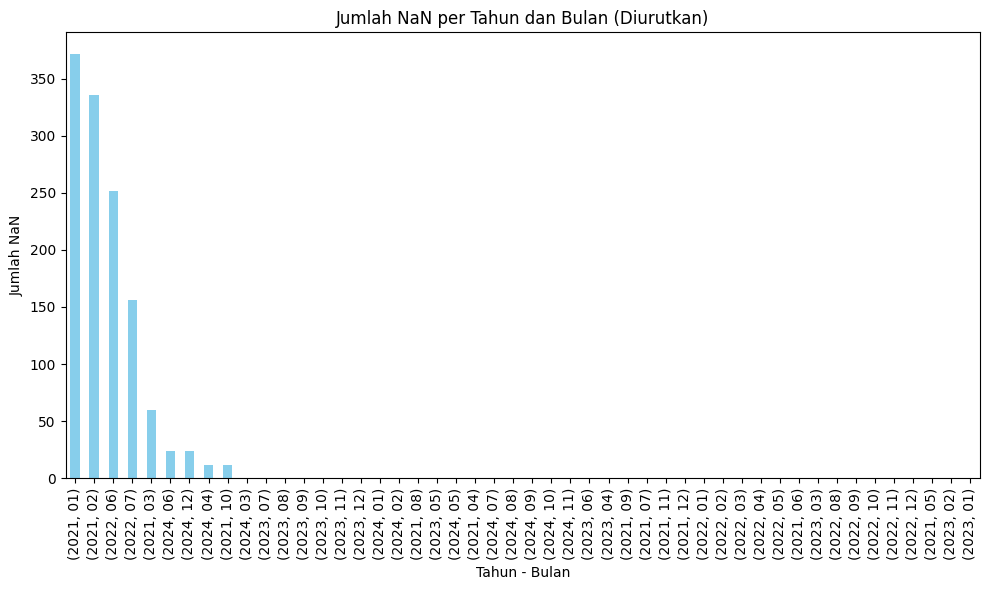

In [ ]:
# Menghitung jumlah NaN per kolom berdasarkan 'Tahun' dan 'Bulan'
nan_per_tahun_bulan = df_harga_pangan.groupby(['Tahun', 'Bulan']).apply(lambda x: x.isna().sum())

# Menghitung jumlah NaN total per kombinasi Tahun dan Bulan
nan_total_per_tahun_bulan = nan_per_tahun_bulan.sum(axis=1)

# Mengurutkan jumlah NaN dari yang tertinggi
nan_total_per_tahun_bulan_sorted = nan_total_per_tahun_bulan.sort_values(ascending=False)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
nan_total_per_tahun_bulan_sorted.plot(kind='bar', color='skyblue')
plt.title('Jumlah NaN per Tahun dan Bulan (Diurutkan)')
plt.xlabel('Tahun - Bulan')
plt.ylabel('Jumlah NaN')
plt.xticks(rotation=90)  # Memutar label pada sumbu X untuk keterbacaan
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [ ]:
df_harga_pangan.columns

Index(['Tanggal', 'Hari', 'Bulan', 'Tahun', 'Beras Premium', 'Beras Medium',
       'Tepung Terigu (Curah)', 'Daging Sapi Murni', 'Daging Ayam Ras',
       'Bawang Merah', 'Bawang Putih Bonggol', 'Cabai Merah Keriting',
       'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
       'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)'],
      dtype='object')

In [ ]:
bulan_dict = {
    '01': 'Januari', '02': 'Februari', '03': 'Maret', '04': 'April', '05': 'Mei', '06': 'Juni',
    '07': 'Juli', '08': 'Agustus', '09': 'September', '10': 'Oktober', '11': 'November', '12': 'Desember'
}

In [ ]:
df_harga_pangan['Bulan'] = df_harga_pangan['Bulan'].replace(bulan_dict)

In [ ]:
df_harga_pangan.head()

Tanggal Hari    Bulan Tahun  Beras Premium  Beras Medium  \
0  01/01/2021   01  Januari  2021            NaN           NaN   
1  02/01/2021   02  Januari  2021            NaN           NaN   
2  03/01/2021   03  Januari  2021            NaN           NaN   
3  04/01/2021   04  Januari  2021            NaN           NaN   
4  05/01/2021   05  Januari  2021            NaN           NaN   

   Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  \
0                    NaN                NaN              NaN           NaN   
1                    NaN                NaN              NaN           NaN   
2                    NaN                NaN              NaN           NaN   
3                    NaN                NaN              NaN           NaN   
4                    NaN                NaN              NaN           NaN   

   Bawang Putih Bonggol  Cabai Merah Keriting  Cabai Rawit Merah  \
0                   NaN                   NaN                NaN   
1                   NaN                   NaN                NaN   
2                   NaN                   NaN                NaN   
3                   NaN                   NaN                NaN   
4                   NaN                   NaN                NaN   

   Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                              NaN             NaN   
1                              NaN             NaN   
2                              NaN             NaN   
3                              NaN             NaN   
4                              NaN             NaN   

   Kedelai Biji Kering (Impor)  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
df_harga_pangan[df_harga_pangan.isna().any(axis=1)]

Tanggal Hari     Bulan Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   01   Januari  2021            NaN           NaN   
1     02/01/2021   02   Januari  2021            NaN           NaN   
2     03/01/2021   03   Januari  2021            NaN           NaN   
3     04/01/2021   04   Januari  2021            NaN           NaN   
4     05/01/2021   05   Januari  2021            NaN           NaN   
...          ...  ...       ...   ...            ...           ...   
1195  10/04/2024   10     April  2024            NaN           NaN   
1263  17/06/2024   17      Juni  2024            NaN           NaN   
1264  18/06/2024   18      Juni  2024            NaN           NaN   
1454  25/12/2024   25  Desember  2024            NaN           NaN   
1455  26/12/2024   26  Desember  2024            NaN           NaN   

      Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  \
0                       NaN                NaN              NaN           NaN   
1                       NaN                NaN              NaN           NaN   
2                       NaN                NaN              NaN           NaN   
3                       NaN                NaN              NaN           NaN   
4                       NaN                NaN              NaN           NaN   
...                     ...                ...              ...           ...   
1195                    NaN                NaN              NaN           NaN   
1263                    NaN                NaN              NaN           NaN   
1264                    NaN                NaN              NaN           NaN   
1454                    NaN                NaN              NaN           NaN   
1455                    NaN                NaN              NaN           NaN   

      Bawang Putih Bonggol  Cabai Merah Keriting  Cabai Rawit Merah  \
0                      NaN                   NaN                NaN   
1                      NaN                   NaN                NaN   
2                      NaN                   NaN                NaN   
3                      NaN                   NaN                NaN   
4                      NaN                   NaN                NaN   
...                    ...                   ...                ...   
1195                   NaN                   NaN                NaN   
1263                   NaN                   NaN                NaN   
1264                   NaN                   NaN                NaN   
1454                   NaN                   NaN                NaN   
1455                   NaN                   NaN                NaN   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                                 NaN             NaN   
1                                 NaN             NaN   
2                                 NaN             NaN   
3                                 NaN             NaN   
4                                 NaN             NaN   
...                               ...             ...   
1195                              NaN             NaN   
1263                              NaN             NaN   
1264                              NaN             NaN   
1454                              NaN             NaN   
1455                              NaN             NaN   

      Kedelai Biji Kering (Impor)  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
...                           ...  
1195                          NaN  
1263                          NaN  
1264                          NaN  
1454                          NaN  
1455                          NaN  

[104 rows x 16 columns]

In [ ]:
daftar_bulan_tahun_nan = df_harga_pangan[df_harga_pangan.isna().any(axis=1)][['Tahun', 'Bulan']].drop_duplicates().copy()

In [ ]:
daftar_bulan_tahun_nan

Tahun     Bulan
0     2021   Januari
31    2021  Februari
59    2021     Maret
284   2021   Oktober
525   2022      Juni
546   2022      Juli
1195  2024     April
1263  2024      Juni
1454  2024  Desember

### Cari Harga Pangan

In [ ]:
path_data_harga_pangan_baru =  path_main_folder + '/#Hasil Data Download Colab/data-harga-pangan-konsumen-per-konsumen.xlsx'

In [ ]:
df_harga_pangan_pelengkap = pd.read_excel(path_data_harga_pangan_baru)
df_harga_pangan_pelengkap.head()

Data Harga Pangan Konsumen per Konsumen      Unnamed: 1      Unnamed: 2  \
0                                      No.  Kode Provinsi   Nama Provinsi   
1                                        1             11            Aceh   
2                                        2             12  Sumatera Utara   
3                                        3             13  Sumatera Barat   
4                                        4             14            Riau   

       Unnamed: 3     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  
0  Kode Komoditas      Komoditas      Tahun      Bulan      Harga  
1             NaN  Beras Premium       2021    Januari     12.072  
2             NaN  Beras Premium       2021    Januari     12.523  
3             NaN  Beras Premium       2021    Januari     13.096  
4             NaN  Beras Premium       2021    Januari     14.605

In [ ]:
# Mengganti nama kolom sesuai dengan yang diinginkan
df_harga_pangan_pelengkap.rename(columns={
    '	Data Harga Pangan Konsumen per Konsumen': 'No.',
    'Unnamed: 1': 'Kode Provinsi',
    'Unnamed: 2': 'Nama Provinsi',
    'Unnamed: 3': 'Kode Komoditas',
    'Unnamed: 4': 'Komoditas',
    'Unnamed: 5': 'Tahun',
    'Unnamed: 6': 'Bulan',
    'Unnamed: 7': 'Harga'
}, inplace=True)

df_harga_pangan_pelengkap.head()

Data Harga Pangan Konsumen per Konsumen   Kode Provinsi   Nama Provinsi  \
0                                      No.  Kode Provinsi   Nama Provinsi   
1                                        1             11            Aceh   
2                                        2             12  Sumatera Utara   
3                                        3             13  Sumatera Barat   
4                                        4             14            Riau   

   Kode Komoditas      Komoditas  Tahun    Bulan   Harga  
0  Kode Komoditas      Komoditas  Tahun    Bulan   Harga  
1             NaN  Beras Premium   2021  Januari  12.072  
2             NaN  Beras Premium   2021  Januari  12.523  
3             NaN  Beras Premium   2021  Januari  13.096  
4             NaN  Beras Premium   2021  Januari  14.605

In [ ]:
df_harga_pangan_pelengkap.columns.values[0] = 'No.'
df_harga_pangan_pelengkap.head()

No.  Kode Provinsi   Nama Provinsi  Kode Komoditas      Komoditas  Tahun  \
0  No.  Kode Provinsi   Nama Provinsi  Kode Komoditas      Komoditas  Tahun   
1    1             11            Aceh             NaN  Beras Premium   2021   
2    2             12  Sumatera Utara             NaN  Beras Premium   2021   
3    3             13  Sumatera Barat             NaN  Beras Premium   2021   
4    4             14            Riau             NaN  Beras Premium   2021   

     Bulan   Harga  
0    Bulan   Harga  
1  Januari  12.072  
2  Januari  12.523  
3  Januari  13.096  
4  Januari  14.605

In [ ]:
df_harga_pangan_pelengkap = df_harga_pangan_pelengkap.drop(index=0)
df_harga_pangan_pelengkap.head()

No. Kode Provinsi   Nama Provinsi Kode Komoditas      Komoditas Tahun  \
1   1            11            Aceh            NaN  Beras Premium  2021   
2   2            12  Sumatera Utara            NaN  Beras Premium  2021   
3   3            13  Sumatera Barat            NaN  Beras Premium  2021   
4   4            14            Riau            NaN  Beras Premium  2021   
5   5            15           Jambi            NaN  Beras Premium  2021   

     Bulan   Harga  
1  Januari  12.072  
2  Januari  12.523  
3  Januari  13.096  
4  Januari  14.605  
5  Januari  12.323

In [ ]:
# Menghapus baris yang 'Nama Provinsi' bukan "Jawa Barat"
df_harga_pangan_pelengkap = df_harga_pangan_pelengkap[df_harga_pangan_pelengkap['Nama Provinsi'] == 'Jawa Barat']

In [ ]:
df_harga_pangan_pelengkap

No. Kode Provinsi Nama Provinsi Kode Komoditas              Komoditas  \
12      12            32    Jawa Barat            NaN          Beras Premium   
46      46            32    Jawa Barat            NaN          Beras Premium   
80      80            32    Jawa Barat            NaN          Beras Premium   
114    114            32    Jawa Barat            NaN          Beras Premium   
148    148            32    Jawa Barat            NaN          Beras Premium   
...    ...           ...           ...            ...                    ...   
8410  8410            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
8444  8444            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
8478  8478            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
8512  8512            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
8546  8546            32    Jawa Barat            NaN  Minyak Goreng Kemasan   

     Tahun      Bulan   Harga  
12    2021    Januari  11.469  
46    2021   Februari  11.447  
80    2021      Maret  11.489  
114   2021      April  11.448  
148   2021        Mei  11.461  
...    ...        ...     ...  
8410  2022        Mei  24.173  
8444  2022       Juni  23.687  
8478  2022       Juli  21.911  
8512  2022    Agustus  19.936  
8546  2022  September  19.296  

[252 rows x 8 columns]

In [ ]:
df_harga_pangan_pelengkap = df_harga_pangan_pelengkap.reset_index(drop=True)
df_harga_pangan_pelengkap

No. Kode Provinsi Nama Provinsi Kode Komoditas              Komoditas  \
0      12            32    Jawa Barat            NaN          Beras Premium   
1      46            32    Jawa Barat            NaN          Beras Premium   
2      80            32    Jawa Barat            NaN          Beras Premium   
3     114            32    Jawa Barat            NaN          Beras Premium   
4     148            32    Jawa Barat            NaN          Beras Premium   
..    ...           ...           ...            ...                    ...   
247  8410            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
248  8444            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
249  8478            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
250  8512            32    Jawa Barat            NaN  Minyak Goreng Kemasan   
251  8546            32    Jawa Barat            NaN  Minyak Goreng Kemasan   

    Tahun      Bulan   Harga  
0    2021    Januari  11.469  
1    2021   Februari  11.447  
2    2021      Maret  11.489  
3    2021      April  11.448  
4    2021        Mei  11.461  
..    ...        ...     ...  
247  2022        Mei  24.173  
248  2022       Juni  23.687  
249  2022       Juli  21.911  
250  2022    Agustus  19.936  
251  2022  September  19.296  

[252 rows x 8 columns]

In [ ]:
df_harga_pangan_pelengkap = df_harga_pangan_pelengkap.drop(columns=['Kode Komoditas', 'Kode Provinsi'])

In [ ]:
df_harga_pangan_pelengkap.head()

No. Nama Provinsi      Komoditas Tahun     Bulan   Harga
0  NaN    Jawa Barat  Beras Premium  2021   Januari  11.469
1  NaN    Jawa Barat  Beras Premium  2021  Februari  11.447
2  NaN    Jawa Barat  Beras Premium  2021     Maret  11.489
3  NaN    Jawa Barat  Beras Premium  2021     April  11.448
4  NaN    Jawa Barat  Beras Premium  2021       Mei  11.461

In [ ]:
df_harga_pangan_pelengkap

No. Nama Provinsi              Komoditas Tahun      Bulan   Harga
0    NaN    Jawa Barat          Beras Premium  2021    Januari  11.469
1    NaN    Jawa Barat          Beras Premium  2021   Februari  11.447
2    NaN    Jawa Barat          Beras Premium  2021      Maret  11.489
3    NaN    Jawa Barat          Beras Premium  2021      April  11.448
4    NaN    Jawa Barat          Beras Premium  2021        Mei  11.461
..   ...           ...                    ...   ...        ...     ...
247  NaN    Jawa Barat  Minyak Goreng Kemasan  2022        Mei  24.173
248  NaN    Jawa Barat  Minyak Goreng Kemasan  2022       Juni  23.687
249  NaN    Jawa Barat  Minyak Goreng Kemasan  2022       Juli  21.911
250  NaN    Jawa Barat  Minyak Goreng Kemasan  2022    Agustus  19.936
251  NaN    Jawa Barat  Minyak Goreng Kemasan  2022  September  19.296

[252 rows x 6 columns]

### Harga Komoditas berdasarkan Data Bulan dan Tahun Kosong pada df_harga_pangan

In [ ]:
bulan_set = set(daftar_bulan_tahun_nan['Bulan'].tolist())
tahun_set = set(daftar_bulan_tahun_nan['Tahun'].tolist())

bulan_list = list(bulan_set)
tahun_list = list(tahun_set)

tahun_list = [int(tahun) for tahun in tahun_list]

print(bulan_list)
print(tahun_list)

['Juni', 'Februari', 'Juli', 'April', 'Oktober', 'Januari', 'Maret', 'Desember']
[2021, 2024, 2022]


In [ ]:
# Menampilkan Harga Komoditas, Bulan, dan Tahun yang sesuai
filtered_data = df_harga_pangan_pelengkap[
    df_harga_pangan_pelengkap['Bulan'].isin(bulan_list) &
    df_harga_pangan_pelengkap['Tahun'].isin(tahun_list)
][['Komoditas', 'Bulan', 'Tahun', 'Harga']]

# Menampilkan hasil
filtered_data

Komoditas     Bulan Tahun   Harga
0            Beras Premium   Januari  2021  11.469
1            Beras Premium  Februari  2021  11.447
2            Beras Premium     Maret  2021  11.489
3            Beras Premium     April  2021  11.448
5            Beras Premium      Juni  2021  11.454
..                     ...       ...   ...     ...
244  Minyak Goreng Kemasan  Februari  2022  18.297
245  Minyak Goreng Kemasan     Maret  2022  19.871
246  Minyak Goreng Kemasan     April  2022  23.793
248  Minyak Goreng Kemasan      Juni  2022  23.687
249  Minyak Goreng Kemasan      Juli  2022  21.911

[168 rows x 4 columns]

In [ ]:
print(filtered_data['Komoditas'].value_counts())
print('\n\n')
print(df_harga_pangan.columns)

Komoditas
Beras Premium             14
Beras Medium              14
Kedelai Biji Kering       14
Bawang Merah              14
Bawang Putih (Bonggol)    14
Cabai Merah Keriting      14
Cabai Rawit Merah         14
Daging Sapi Murni         14
Daging Ayam Ras           14
Telur Ayam Ras            14
Gula Pasir Lokal/Curah    14
Minyak Goreng Kemasan     14
Name: count, dtype: int64



Index(['Tanggal', 'Hari', 'Bulan', 'Tahun', 'Beras Premium', 'Beras Medium',
       'Tepung Terigu (Curah)', 'Daging Sapi Murni', 'Daging Ayam Ras',
       'Bawang Merah', 'Bawang Putih Bonggol', 'Cabai Merah Keriting',
       'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
       'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)'],
      dtype='object')


In [ ]:
# Daftar komoditas yang ingin ditampilkan
komoditas_filter = [
    'Beras Premium', 'Beras Medium', 'Kedelai Biji Kering',
    'Bawang Merah', 'Bawang Putih (Bonggol)', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Telur Ayam Ras', 'Gula Pasir Lokal/Curah', 'Minyak Goreng Kemasan'
]

# Daftar tahun dan bulan yang ingin difilter
waktu_filter = [
    (2021, 'Januari'), (2021, 'Februari'), (2021, 'Maret'), (2021, 'Oktober'),
    (2022, 'Juni'), (2022, 'Juli'), (2024, 'April'), (2024, 'Juni'), (2024, 'Desember')
]

# Filter data berdasarkan komoditas dan waktu
filtered_data_baru = df_harga_pangan_pelengkap[
    df_harga_pangan_pelengkap['Komoditas'].isin(komoditas_filter) &
    df_harga_pangan_pelengkap.apply(lambda x: (x['Tahun'], x['Bulan']) in waktu_filter, axis=1)
]

# Menampilkan hasil
print(filtered_data_baru)


     No. Nama Provinsi              Komoditas Tahun     Bulan   Harga
0    NaN    Jawa Barat          Beras Premium  2021   Januari  11.469
1    NaN    Jawa Barat          Beras Premium  2021  Februari  11.447
2    NaN    Jawa Barat          Beras Premium  2021     Maret  11.489
9    NaN    Jawa Barat          Beras Premium  2021   Oktober   11.55
17   NaN    Jawa Barat          Beras Premium  2022      Juni  11.621
..   ...           ...                    ...   ...       ...     ...
232  NaN    Jawa Barat  Minyak Goreng Kemasan  2021  Februari   12.47
233  NaN    Jawa Barat  Minyak Goreng Kemasan  2021     Maret  12.671
240  NaN    Jawa Barat  Minyak Goreng Kemasan  2021   Oktober  15.645
248  NaN    Jawa Barat  Minyak Goreng Kemasan  2022      Juni  23.687
249  NaN    Jawa Barat  Minyak Goreng Kemasan  2022      Juli  21.911

[72 rows x 6 columns]


In [ ]:
komoditas_urut = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih (Bonggol)', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
    'Telur Ayam Ras', 'Kedelai Biji Kering'
]

In [ ]:
komoditas_urut = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih (Bonggol)', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
    'Telur Ayam Ras', 'Kedelai Biji Kering'
]


In [ ]:
# Filter data untuk Januari 2021
jan_2021 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2021) & (filtered_data_baru['Bulan'] == 'Januari')
]
jan_2021 = jan_2021[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Februari 2021
feb_2021 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2021) & (filtered_data_baru['Bulan'] == 'Februari')
]
feb_2021 = feb_2021[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Maret 2021
mar_2021 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2021) & (filtered_data_baru['Bulan'] == 'Maret')
]
mar_2021 = mar_2021[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Oktober 2021
okt_2021 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2021) & (filtered_data_baru['Bulan'] == 'Oktober')
]
okt_2021 = okt_2021[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Juni 2022
jun_2022 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2022) & (filtered_data_baru['Bulan'] == 'Juni')
]
jun_2022 = jun_2022[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Juli 2022
jul_2022 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2022) & (filtered_data_baru['Bulan'] == 'Juli')
]
jul_2022 = jul_2022[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk April 2024
apr_2024 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2024) & (filtered_data_baru['Bulan'] == 'April')
]
apr_2024 = apr_2024[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Juni 2024
jun_2024 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2024) & (filtered_data_baru['Bulan'] == 'Juni')
]
jun_2024 = jun_2024[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Filter data untuk Desember 2024
dec_2024 = filtered_data_baru[
    (filtered_data_baru['Tahun'] == 2024) & (filtered_data_baru['Bulan'] == 'Desember')
]
dec_2024 = dec_2024[['Tahun', 'Bulan', 'Komoditas', 'Harga']]

# Menampilkan hasil dari semua filter yang terpisah
print("Januari 2021:\n", jan_2021)
print("\nFebruari 2021:\n", feb_2021)
print("\nMaret 2021:\n", mar_2021)
print("\nOktober 2021:\n", okt_2021)
print("\nJuni 2022:\n", jun_2022)
print("\nJuli 2022:\n", jul_2022)
print("\nApril 2024:\n", apr_2024)
print("\nJuni 2024:\n", jun_2024)
print("\nDesember 2024:\n", dec_2024)

Januari 2021:
     Tahun    Bulan               Komoditas    Harga
0    2021  Januari           Beras Premium   11.469
21   2021  Januari            Beras Medium   10.213
42   2021  Januari     Kedelai Biji Kering   11.094
63   2021  Januari            Bawang Merah   27.927
84   2021  Januari  Bawang Putih (Bonggol)   25.971
105  2021  Januari    Cabai Merah Keriting     50.1
126  2021  Januari       Cabai Rawit Merah   78.998
147  2021  Januari       Daging Sapi Murni  117.165
168  2021  Januari         Daging Ayam Ras   35.402
189  2021  Januari          Telur Ayam Ras   24.152
210  2021  Januari  Gula Pasir Lokal/Curah   13.172
231  2021  Januari   Minyak Goreng Kemasan   12.587

Februari 2021:
     Tahun     Bulan               Komoditas   Harga
1    2021  Februari           Beras Premium  11.447
22   2021  Februari            Beras Medium  10.157
43   2021  Februari     Kedelai Biji Kering  10.952
64   2021  Februari            Bawang Merah  30.047
85   2021  Februari  Bawang Puti

### Mengisi Kolom Kosong

In [ ]:
path_pangan_nan = path_analysis_folder + "/harga_pangan_nan.xlsx"
df_harga_pangan.to_excel(path_pangan_nan, index=False)

In [ ]:
files.download(path_pangan_nan)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
path_pangan_filled4 = path_analysis_folder + "/harga_pangan_filled.xlsx"
df_harga_pangan_filled4 = pd.read_excel(path_pangan_filled4)
df_harga_pangan_filled4.head()

Tanggal  Hari    Bulan   Tahun  Beras Premium  Beras Medium  \
0  01/01/2021   1.0  Januari  2021.0          11469         10213   
1  02/01/2021   2.0  Januari  2021.0          11469         10213   
2  03/01/2021   3.0  Januari  2021.0          11469         10213   
3  04/01/2021   4.0  Januari  2021.0          11469         10213   
4  05/01/2021   5.0  Januari  2021.0          11469         10213   

   Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  \
0                    NaN             117165            35402         27927   
1                    NaN             117165            35402         27927   
2                    NaN             117165            35402         27927   
3                    NaN             117165            35402         27927   
4                    NaN             117165            35402         27927   

   Bawang Putih Bonggol  Cabai Merah Keriting  Cabai Rawit Merah  \
0                 25971                 50100              78998   
1                 25971                 50100              78998   
2                 25971                 50100              78998   
3                 25971                 50100              78998   
4                 25971                 50100              78998   

   Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                            12587           24152   
1                            12587           24152   
2                            12587           24152   
3                            12587           24152   
4                            12587           24152   

   Kedelai Biji Kering (Impor)  
0                        11094  
1                        11094  
2                        11094  
3                        11094  
4                        11094

In [ ]:
print(df_harga_pangan_filled4.isna().sum())

Tanggal                             2
Hari                                2
Bulan                               2
Tahun                               2
Beras Premium                       0
Beras Medium                        0
Tepung Terigu (Curah)              98
Daging Sapi Murni                   0
Daging Ayam Ras                     0
Bawang Merah                        0
Bawang Putih Bonggol                0
Cabai Merah Keriting                0
Cabai Rawit Merah                   0
Minyak Goreng Kemasan Sederhana     0
Telur Ayam Ras                      0
Kedelai Biji Kering (Impor)         0
dtype: int64


In [ ]:
df_harga_pangan_filled4[df_harga_pangan_filled4.isna().any(axis=1)]

Tanggal  Hari    Bulan   Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   1.0  Januari  2021.0          11469         10213   
1     02/01/2021   2.0  Januari  2021.0          11469         10213   
2     03/01/2021   3.0  Januari  2021.0          11469         10213   
3     04/01/2021   4.0  Januari  2021.0          11469         10213   
4     05/01/2021   5.0  Januari  2021.0          11469         10213   
...          ...   ...      ...     ...            ...           ...   
556   11/07/2022  11.0     Juli  2022.0          11686         10162   
557   12/07/2022  12.0     Juli  2022.0          11686         10162   
558   13/07/2022  13.0     Juli  2022.0          11686         10162   
1461         NaN   NaN      NaN     NaN          16670         15180   
1462         NaN   NaN      NaN     NaN          11350          9950   

      Tepung Terigu (Curah)  Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  \
0                       NaN             117165            35402         27927   
1                       NaN             117165            35402         27927   
2                       NaN             117165            35402         27927   
3                       NaN             117165            35402         27927   
4                       NaN             117165            35402         27927   
...                     ...                ...              ...           ...   
556                     NaN             135431            37765         56774   
557                     NaN             135431            37765         56774   
558                     NaN             135431            37765         56774   
1461                11040.0             154740            44370         65350   
1462                 7680.0             114900            31500         21890   

      Bawang Putih Bonggol  Cabai Merah Keriting  Cabai Rawit Merah  \
0                    25971                 50100              78998   
1                    25971                 50100              78998   
2                    25971                 50100              78998   
3                    25971                 50100              78998   
4                    25971                 50100              78998   
...                    ...                   ...                ...   
556                  26116                 82338              89009   
557                  26116                 82338              89009   
558                  26116                 82338              89009   
1461                 42510                 90350             120210   
1462                 23860                 21350              24560   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
556                             21911           27974   
557                             21911           27974   
558                             21911           27974   
1461                            24820           32250   
1462                            12470           19290   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
556                         13788  
557                         13788  
558                         13788  
1461                        15370  
1462                         9310  

[100 rows x 16 columns]

In [ ]:
df_harga_pangan_filled4 = df_harga_pangan_filled4.drop(columns=['Tepung Terigu (Curah)'])

In [ ]:
print(df_harga_pangan_filled4.isna().sum())

Tanggal                            2
Hari                               2
Bulan                              2
Tahun                              2
Beras Premium                      0
Beras Medium                       0
Daging Sapi Murni                  0
Daging Ayam Ras                    0
Bawang Merah                       0
Bawang Putih Bonggol               0
Cabai Merah Keriting               0
Cabai Rawit Merah                  0
Minyak Goreng Kemasan Sederhana    0
Telur Ayam Ras                     0
Kedelai Biji Kering (Impor)        0
dtype: int64


In [ ]:
# Menghapus 2 baris terbawah
df_harga_pangan_filled4 = df_harga_pangan_filled4.iloc[:-2]

# Tampilkan hasil untuk memastikan
print(df_harga_pangan_filled4)

         Tanggal  Hari     Bulan   Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   1.0   Januari  2021.0          11469         10213   
1     02/01/2021   2.0   Januari  2021.0          11469         10213   
2     03/01/2021   3.0   Januari  2021.0          11469         10213   
3     04/01/2021   4.0   Januari  2021.0          11469         10213   
4     05/01/2021   5.0   Januari  2021.0          11469         10213   
...          ...   ...       ...     ...            ...           ...   
1456  27/12/2024  27.0  Desember  2024.0          14550         12910   
1457  28/12/2024  28.0  Desember  2024.0          14560         12880   
1458  29/12/2024  29.0  Desember  2024.0          14600         12930   
1459  30/12/2024  30.0  Desember  2024.0          14610         12910   
1460  31/12/2024  31.0  Desember  2024.0          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402   

In [ ]:
df_harga_pangan_clean = df_harga_pangan_filled4.copy()

In [ ]:
df_harga_pangan_clean

Tanggal  Hari     Bulan   Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   1.0   Januari  2021.0          11469         10213   
1     02/01/2021   2.0   Januari  2021.0          11469         10213   
2     03/01/2021   3.0   Januari  2021.0          11469         10213   
3     04/01/2021   4.0   Januari  2021.0          11469         10213   
4     05/01/2021   5.0   Januari  2021.0          11469         10213   
...          ...   ...       ...     ...            ...           ...   
1456  27/12/2024  27.0  Desember  2024.0          14550         12910   
1457  28/12/2024  28.0  Desember  2024.0          14560         12880   
1458  29/12/2024  29.0  Desember  2024.0          14600         12930   
1459  30/12/2024  30.0  Desember  2024.0          14610         12910   
1460  31/12/2024  31.0  Desember  2024.0          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
1456                         9340  
1457                         9310  
1458                         9320  
1459                         9400  
1460                         9380  

[1461 rows x 15 columns]

In [ ]:
# Mengubah kolom 'daerah' menjadi lowercase
df_harga_pangan_clean['Bulan'] = df_harga_pangan_clean['Bulan'].str.lower()

# Tampilkan hasil
df_harga_pangan_clean

Tanggal  Hari     Bulan   Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   1.0   januari  2021.0          11469         10213   
1     02/01/2021   2.0   januari  2021.0          11469         10213   
2     03/01/2021   3.0   januari  2021.0          11469         10213   
3     04/01/2021   4.0   januari  2021.0          11469         10213   
4     05/01/2021   5.0   januari  2021.0          11469         10213   
...          ...   ...       ...     ...            ...           ...   
1456  27/12/2024  27.0  desember  2024.0          14550         12910   
1457  28/12/2024  28.0  desember  2024.0          14560         12880   
1458  29/12/2024  29.0  desember  2024.0          14600         12930   
1459  30/12/2024  30.0  desember  2024.0          14610         12910   
1460  31/12/2024  31.0  desember  2024.0          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
1456                         9340  
1457                         9310  
1458                         9320  
1459                         9400  
1460                         9380  

[1461 rows x 15 columns]

In [ ]:
path_harga_pangan_clean = path_analysis_folder + "/harga_pangan_clean.xlsx"
df_harga_pangan_clean.to_excel(path_harga_pangan_clean, index=False)

## Inflasi

In [ ]:
df_inflasi

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.19  0.26  0.35  0.45
2       maret  0.01  0.69 -0.18  0.51
3       april  0.22  1.07  0.40  0.15
4         mei  0.38  0.34  0.12 -0.12
5        juni -0.23  0.57  0.15 -0.04
6        juli  0.11  0.62  0.21  0.06
7     agustus  0.14 -0.06 -0.05  0.07
8   september -0.11  1.21  0.11 -0.21
9     oktober  0.07 -0.11  0.13  0.02
10   november  0.27  0.10  0.36  0.24
11   desember  0.46  0.74  0.37  0.35
12    tahunan  1.69  6.04  2.48  1.64

In [ ]:
# Mengubah kolom 'daerah' menjadi lowercase
df_inflasi['Bulan'] = df_inflasi['Bulan'].str.lower()

# Tampilkan hasil
df_inflasi

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.19  0.26  0.35  0.45
2       maret  0.01  0.69 -0.18  0.51
3       april  0.22  1.07  0.40  0.15
4         mei  0.38  0.34  0.12 -0.12
5        juni -0.23  0.57  0.15 -0.04
6        juli  0.11  0.62  0.21  0.06
7     agustus  0.14 -0.06 -0.05  0.07
8   september -0.11  1.21  0.11 -0.21
9     oktober  0.07 -0.11  0.13  0.02
10   november  0.27  0.10  0.36  0.24
11   desember  0.46  0.74  0.37  0.35
12    tahunan  1.69  6.04  2.48  1.64

In [ ]:
kolom_inflasi = df_inflasi.columns
shape_inflasi = df_inflasi.shape

print("Nama Kolom: ", kolom_inflasi,"\n")
print("Shape: ", shape_inflasi)

Nama Kolom:  Index(['Bulan', '2021', '2022', '2023', '2024'], dtype='object') 

Shape:  (13, 5)


In [ ]:
df_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bulan   13 non-null     object 
 1   2021    13 non-null     float64
 2   2022    13 non-null     float64
 3   2023    13 non-null     float64
 4   2024    13 non-null     float64
dtypes: float64(4), object(1)
memory usage: 652.0+ bytes


In [ ]:
df_inflasi.describe()

2021       2022       2023       2024
count  13.000000  13.000000  13.000000  13.000000
mean    0.258462   0.916923   0.378462   0.251538
std     0.468007   1.589163   0.658481   0.467598
min    -0.230000  -0.110000  -0.180000  -0.210000
25%     0.070000   0.260000   0.120000   0.020000
50%     0.160000   0.570000   0.210000   0.150000
75%     0.270000   0.740000   0.370000   0.350000
max     1.690000   6.040000   2.480000   1.640000

In [ ]:
path_inflasi_mtm_clean = path_analysis_folder + "/inflasi_mtm_clean.xlsx"
df_inflasi.to_excel(path_inflasi_mtm_clean, index=False)

## umr

In [ ]:
df_umr

Daerah        2021        2022        2023     2024
0         KABUPATEN BANDUNG  3241929.67  3241929.67  3492465.99  3527967
1   KABUPATEN BANDUNG BARAT  3248283.28  3248283.28  3480795.40  3508677
2          KABUPATEN BEKASI  4791843.90  4791843.90  5137575.44  5219263
3           KABUPATEN BOGOR  4217206.00  4217206.00  4520212.25  4579541
4          KABUPATEN CIAMIS  1880654.54  1897867.14  2021657.42  2089464
5         KABUPATEN CIANJUR  2534798.99  2699814.40  2893229.10  2915102
6         KABUPATEN CIREBON  2269556.75  2279982.77  2430780.83  2517730
7           KABUPATEN GARUT  1961085.70  1975220.92  2117318.31  2186437
8       KABUPATEN INDRAMAYU  2373073.46  2391567.15  2541996.72  2623697
9        KABUPATEN KARAWANG  4798312.00  4798312.00  5176179.07  5257834
10       KABUPATEN KUNINGAN  1882642.36  1908102.17  2010734.30  2074666
11     KABUPATEN MAJALENGKA  2009000.00  2027619.04  2180602.90  2257871
12    KABUPATEN PANGANDARAN  1860591.33  1884364.08  2018389.00  2086126
13     KABUPATEN PURWAKARTA  4173568.61  4173568.61  4464675.02  4499768
14         KABUPATEN SUBANG  3064218.08  3064218.08  3273810.60  3294485
15       KABUPATEN SUKABUMI  3125444.72  3125444.72  3351883.19  3384491
16       KABUPATEN SUMEDANG  3241929.67  3241929.67  3471134.10  3504308
17    KABUPATEN TASIKMALAYA  2251787.92  2326772.46  2499954.13  2535204
18             KOTA BANDUNG  3742276.48  3774860.78  4048462.69  4209309
19              KOTA BANJAR  1831884.83  1852099.52  1998119.05  2070192
20              KOTA BEKASI  4782935.64  4816921.17  5158248.20  5343430
21               KOTA BOGOR  4169806.58  4330249.57  4639429.39  4813988
22              KOTA CIMAHI  3241929.00  3272668.50  3514093.25  3627880
23             KOTA CIREBON  2271201.73  2304943.51  2456516.60  2533038
24               KOTA DEPOK  4339514.73  4377231.93  4694493.70  4878612
25            KOTA SUKABUMI  2530182.63  2562434.01  2747774.86  2834399
26         KOTA TASIKMALAYA  2264093.28  2363389.67  2533341.02  2630951

In [ ]:
kolom_umr = df_umr.columns
shape_umr = df_umr.shape

print("Nama Kolom: ", kolom_umr,"\n")
print("Shape: ", shape_umr)

Nama Kolom:  Index(['Daerah', '2021', '2022', '2023', '2024'], dtype='object') 

Shape:  (27, 5)


In [ ]:
df_umr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Daerah  27 non-null     object 
 1   2021    27 non-null     float64
 2   2022    27 non-null     float64
 3   2023    27 non-null     float64
 4   2024    27 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df_umr.describe()

2021          2022          2023          2024
count  2.700000e+01  2.700000e+01  2.700000e+01  2.700000e+01
mean   3.040732e+06  3.072179e+06  3.291625e+06  3.370534e+06
std    1.012047e+06  1.009197e+06  1.086027e+06  1.106474e+06
min    1.831885e+06  1.852100e+06  1.998119e+06  2.070192e+06
25%    2.257941e+06  2.292463e+06  2.443649e+06  2.525384e+06
50%    3.064218e+06  3.064218e+06  3.273811e+06  3.294485e+06
75%    3.956042e+06  3.974215e+06  4.256569e+06  4.354538e+06
max    4.798312e+06  4.816921e+06  5.176179e+06  5.343430e+06

In [ ]:
df_umr.columns

Index(['Daerah', '2021', '2022', '2023', '2024'], dtype='object')

In [ ]:
# Mengubah kolom 'daerah' menjadi lowercase
df_umr['Daerah'] = df_umr['Daerah'].str.lower()

# Tampilkan hasil
df_umr

Daerah        2021        2022        2023     2024
0         kabupaten bandung  3241929.67  3241929.67  3492465.99  3527967
1   kabupaten bandung barat  3248283.28  3248283.28  3480795.40  3508677
2          kabupaten bekasi  4791843.90  4791843.90  5137575.44  5219263
3           kabupaten bogor  4217206.00  4217206.00  4520212.25  4579541
4          kabupaten ciamis  1880654.54  1897867.14  2021657.42  2089464
5         kabupaten cianjur  2534798.99  2699814.40  2893229.10  2915102
6         kabupaten cirebon  2269556.75  2279982.77  2430780.83  2517730
7           kabupaten garut  1961085.70  1975220.92  2117318.31  2186437
8       kabupaten indramayu  2373073.46  2391567.15  2541996.72  2623697
9        kabupaten karawang  4798312.00  4798312.00  5176179.07  5257834
10       kabupaten kuningan  1882642.36  1908102.17  2010734.30  2074666
11     kabupaten majalengka  2009000.00  2027619.04  2180602.90  2257871
12    kabupaten pangandaran  1860591.33  1884364.08  2018389.00  2086126
13     kabupaten purwakarta  4173568.61  4173568.61  4464675.02  4499768
14         kabupaten subang  3064218.08  3064218.08  3273810.60  3294485
15       kabupaten sukabumi  3125444.72  3125444.72  3351883.19  3384491
16       kabupaten sumedang  3241929.67  3241929.67  3471134.10  3504308
17    kabupaten tasikmalaya  2251787.92  2326772.46  2499954.13  2535204
18             kota bandung  3742276.48  3774860.78  4048462.69  4209309
19              kota banjar  1831884.83  1852099.52  1998119.05  2070192
20              kota bekasi  4782935.64  4816921.17  5158248.20  5343430
21               kota bogor  4169806.58  4330249.57  4639429.39  4813988
22              kota cimahi  3241929.00  3272668.50  3514093.25  3627880
23             kota cirebon  2271201.73  2304943.51  2456516.60  2533038
24               kota depok  4339514.73  4377231.93  4694493.70  4878612
25            kota sukabumi  2530182.63  2562434.01  2747774.86  2834399
26         kota tasikmalaya  2264093.28  2363389.67  2533341.02  2630951

# Visualisasi Data Bersih

## Visualisasi Harga Pangan

In [ ]:
df_harga_pangan_clean

Tanggal  Hari     Bulan   Tahun  Beras Premium  Beras Medium  \
0     01/01/2021   1.0   januari  2021.0          11469         10213   
1     02/01/2021   2.0   januari  2021.0          11469         10213   
2     03/01/2021   3.0   januari  2021.0          11469         10213   
3     04/01/2021   4.0   januari  2021.0          11469         10213   
4     05/01/2021   5.0   januari  2021.0          11469         10213   
...          ...   ...       ...     ...            ...           ...   
1456  27/12/2024  27.0  desember  2024.0          14550         12910   
1457  28/12/2024  28.0  desember  2024.0          14560         12880   
1458  29/12/2024  29.0  desember  2024.0          14600         12930   
1459  30/12/2024  30.0  desember  2024.0          14610         12910   
1460  31/12/2024  31.0  desember  2024.0          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
1456                         9340  
1457                         9310  
1458                         9320  
1459                         9400  
1460                         9380  

[1461 rows x 15 columns]

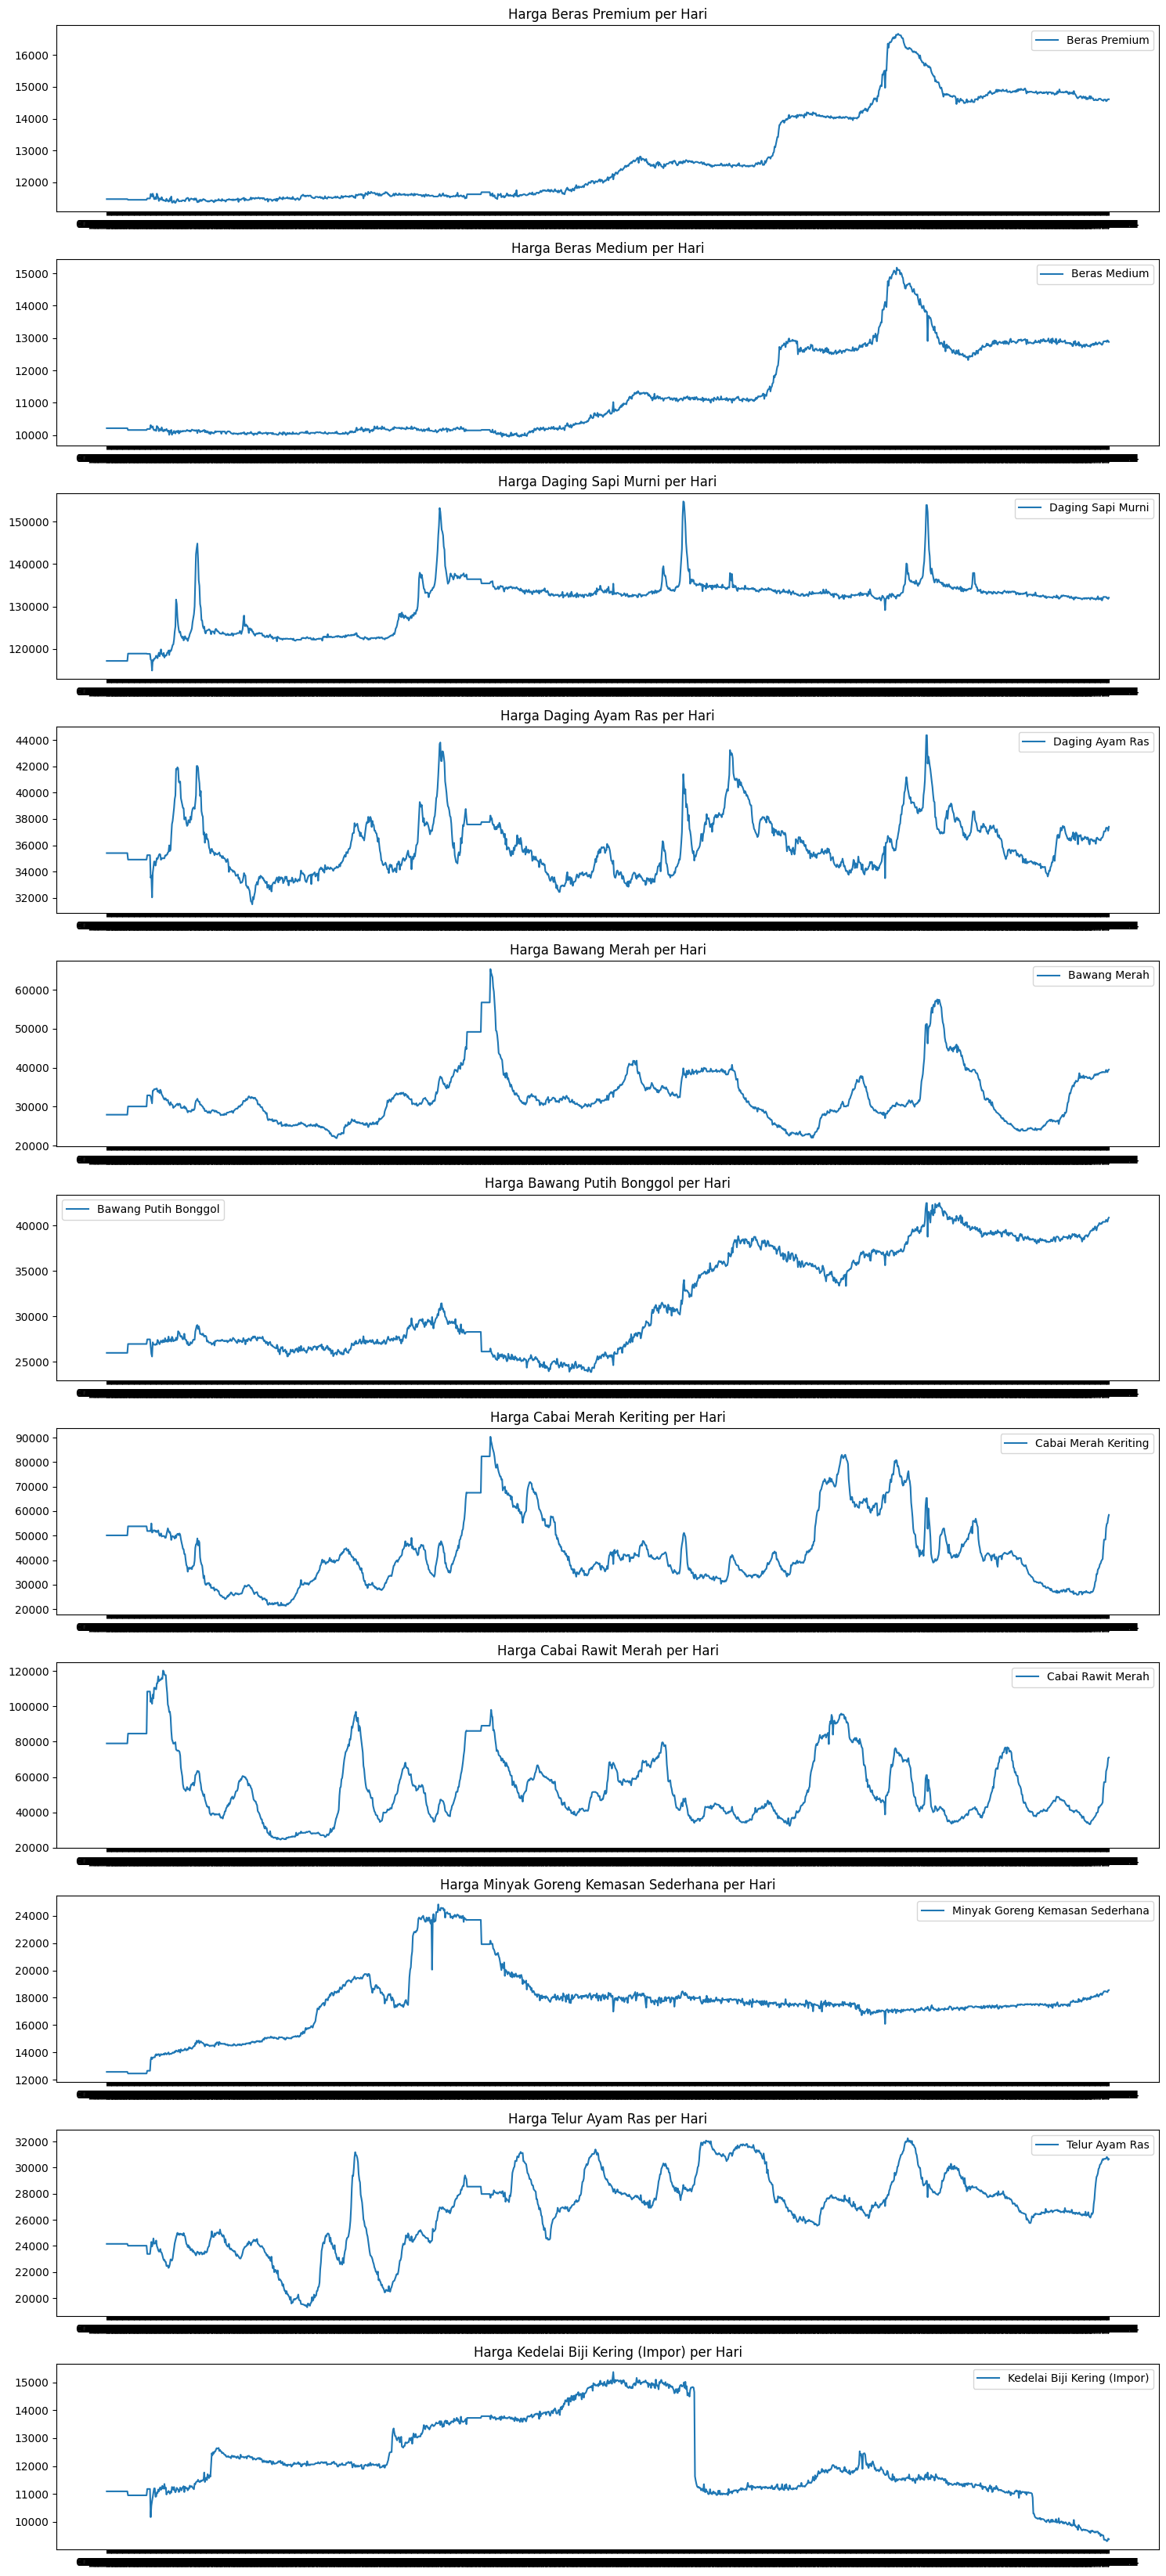

In [ ]:
import matplotlib.pyplot as plt

# Daftar kolom yang akan diplot
columns_to_plot = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih Bonggol', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
    'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)'
]

# Plotting
plt.figure(figsize=(15, len(columns_to_plot) * 3))  # Tinggi disesuaikan dengan jumlah kolom

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(df_harga_pangan_clean['Tanggal'], df_harga_pangan_clean[column], label=column)
    plt.title(f'Harga {column} per Hari')
    plt.legend()

plt.tight_layout()
plt.show()


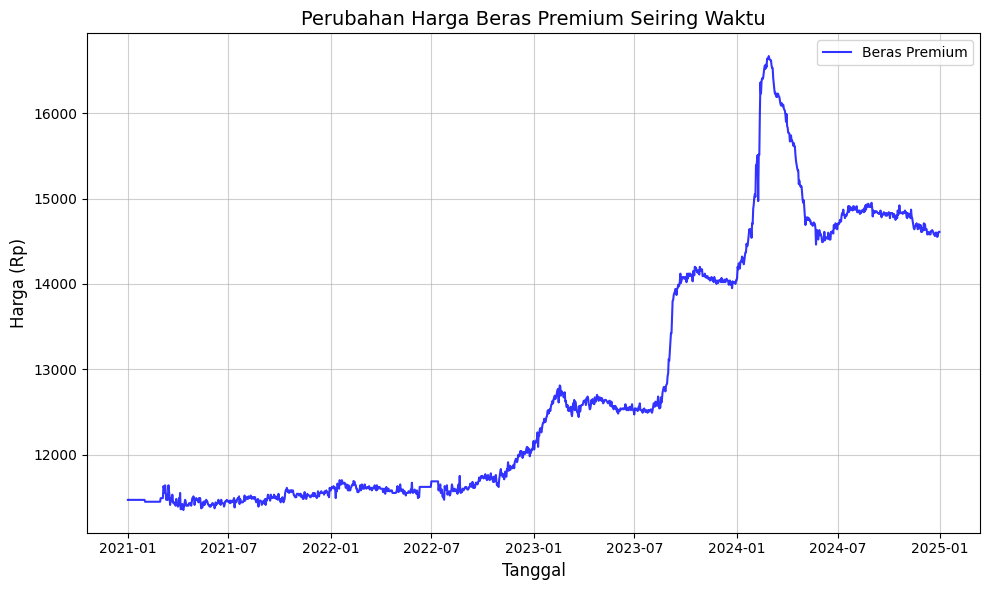

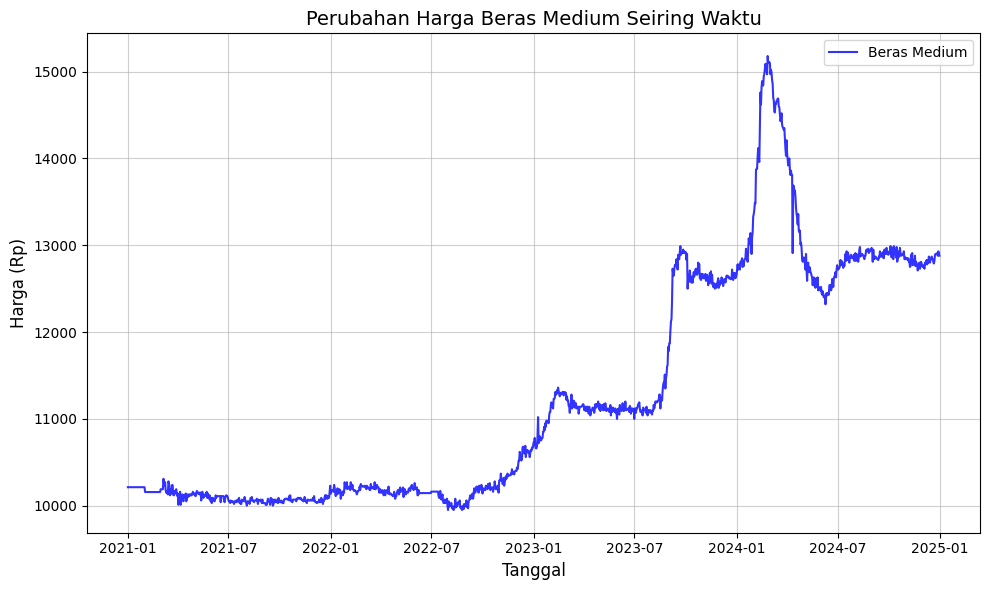

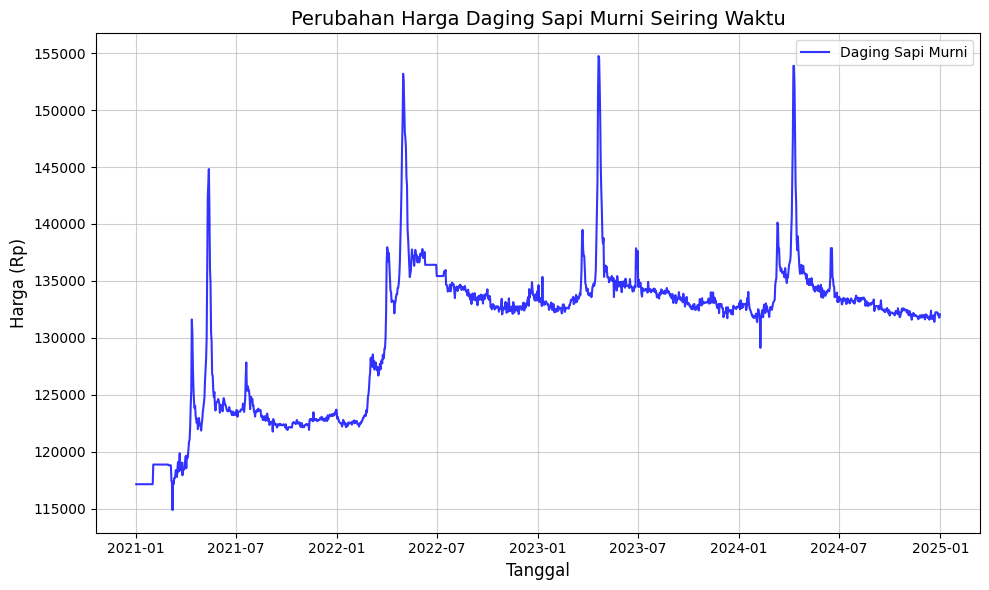

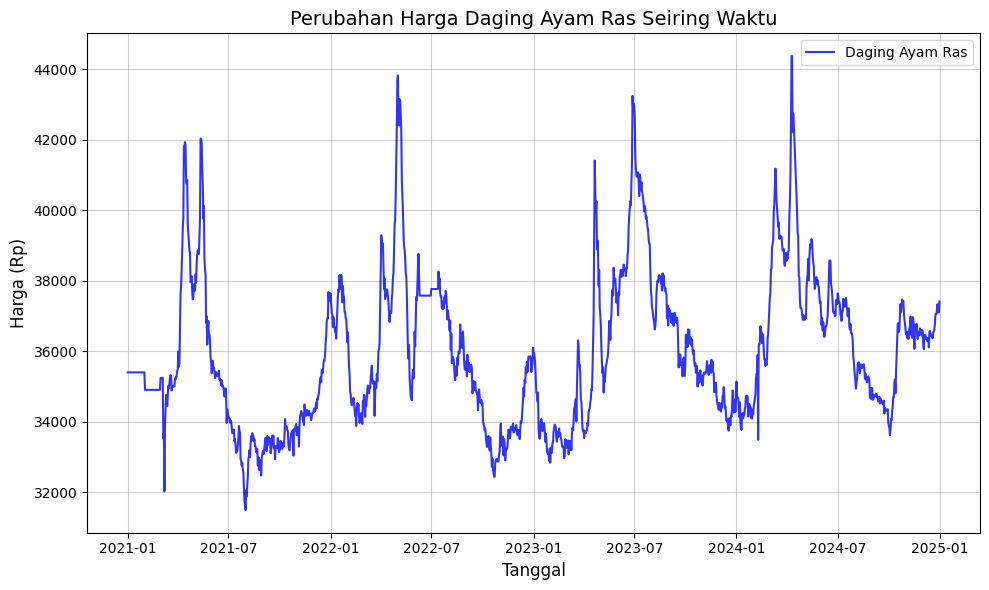

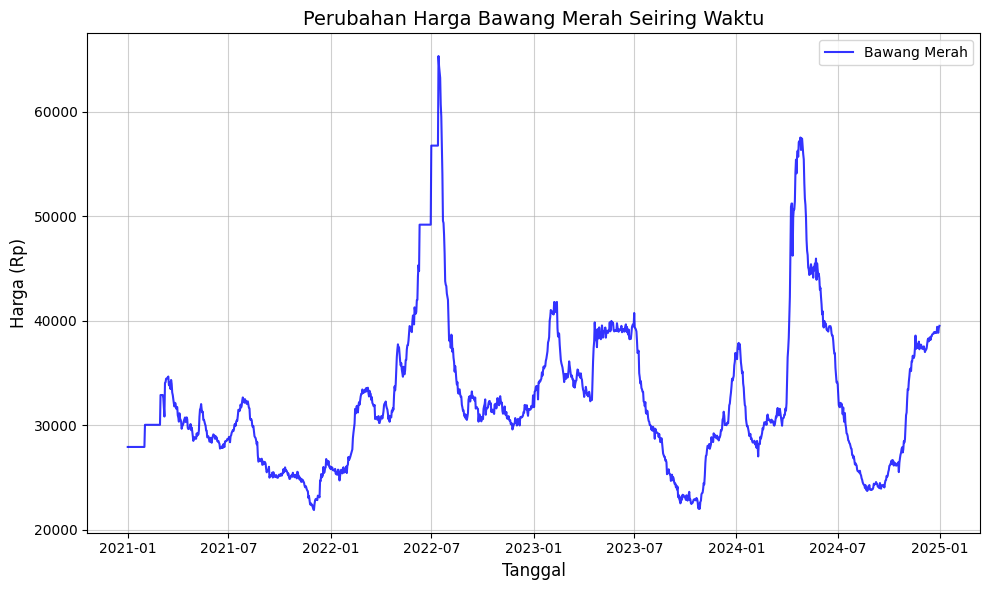

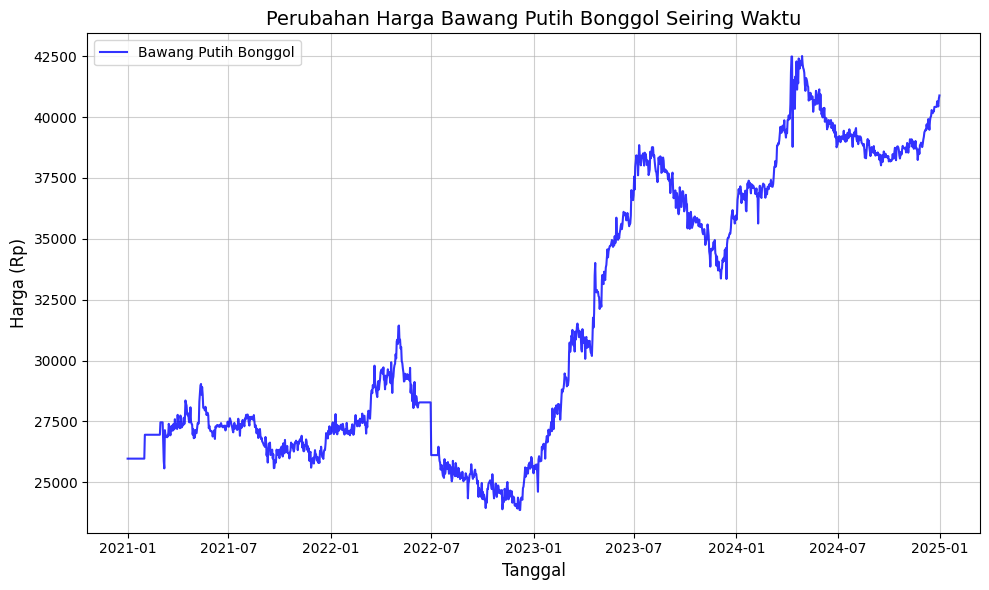

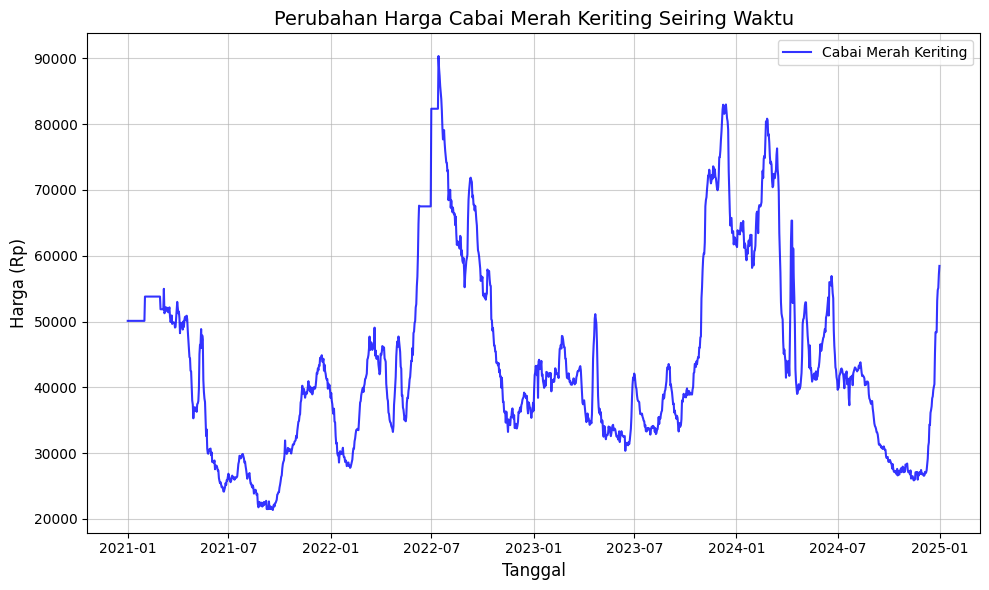

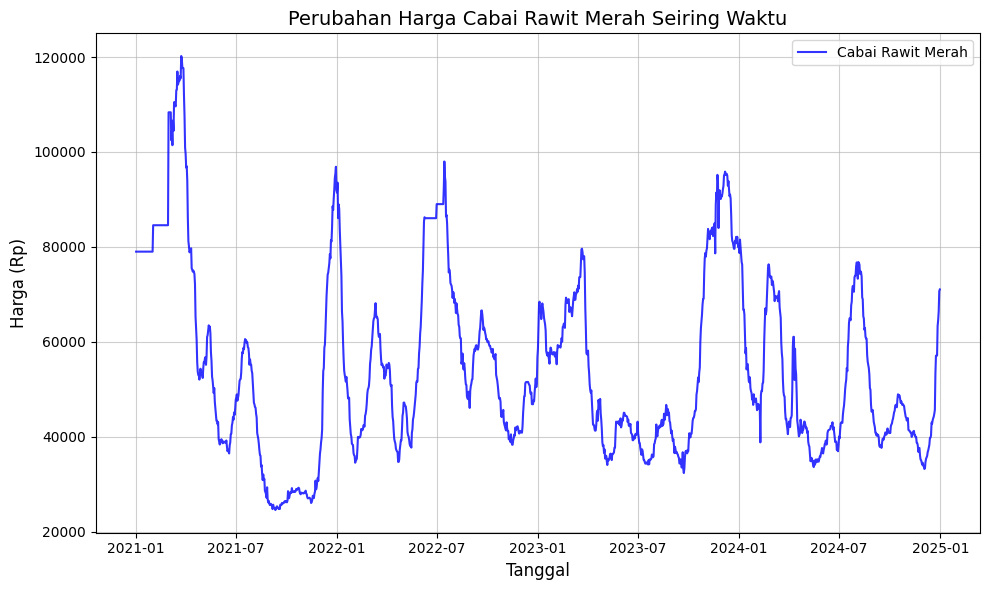

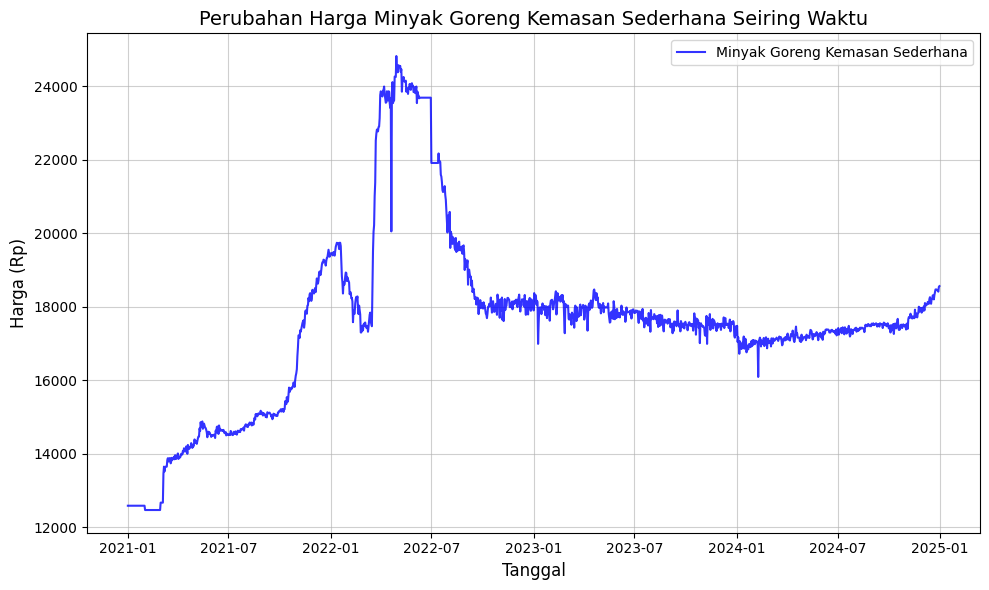

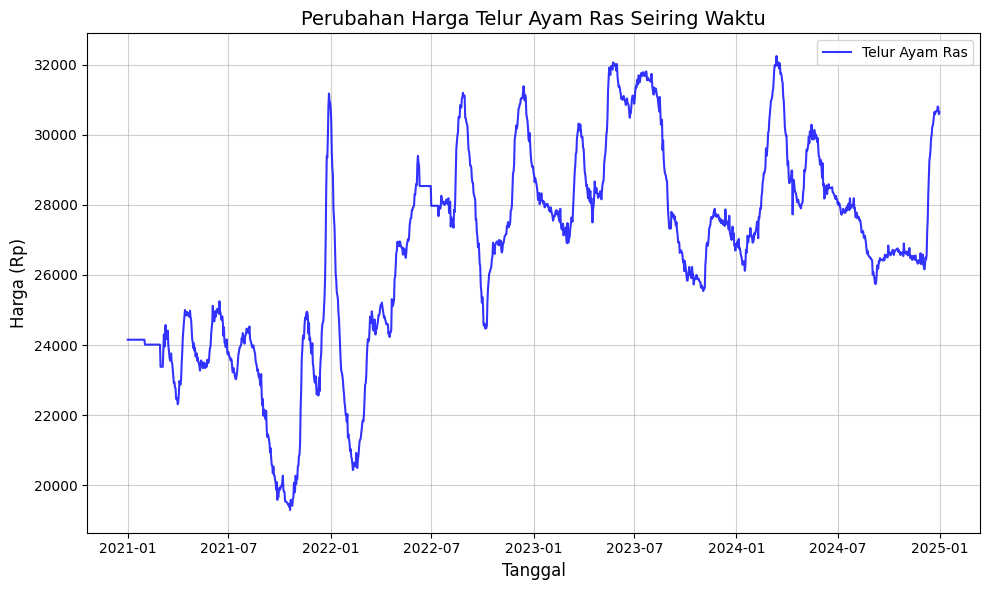

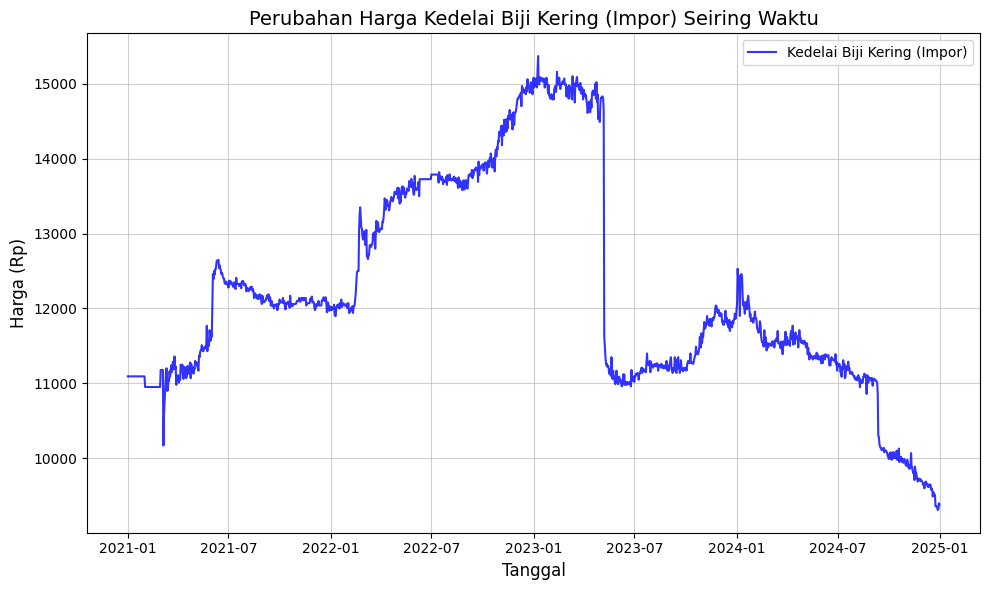

In [ ]:
# Assuming df_harga_pangan_clean is already loaded and contains the data
import matplotlib.pyplot as plt

# Ensure 'Tanggal' is datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Columns to plot
columns_to_plot = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih Bonggol', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
    'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)'
]

# Plot each column as a separate line chart
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df_harga_pangan_clean['Tanggal'], df_harga_pangan_clean[column], label=column, color='blue', alpha=0.8)
    plt.title(f'Perubahan Harga {column} Seiring Waktu', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Harga (Rp)', fontsize=12)
    plt.grid(True, alpha=0.6)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
pip install --upgrade plotly pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Daftar kolom yang akan diplot
columns_to_plot = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih Bonggol'
]

# Plot tiap kolom secara interaktif
for column in columns_to_plot:
    fig = px.line(
        df_harga_pangan_clean,
        x='Tanggal',
        y=column,
        title=f'Perubahan Harga {column} Seiring Waktu',
        labels={'Tanggal': 'Tanggal', column: 'Harga (Rp)'},
        hover_data={'Tanggal': True, column: True}  # Menampilkan tooltip
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()

In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Daftar kolom yang akan diplot
columns_to_plot = [ 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Minyak Goreng Kemasan Sederhana',
    'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)'
]

# Plot tiap kolom secara interaktif
for column in columns_to_plot:
    fig = px.line(
        df_harga_pangan_clean,
        x='Tanggal',
        y=column,
        title=f'Perubahan Harga {column} Seiring Waktu',
        labels={'Tanggal': 'Tanggal', column: 'Harga (Rp)'},
        hover_data={'Tanggal': True, column: True}  # Menampilkan tooltip
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()

In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Grup kolom untuk visualisasi
groups_to_plot = [
    ['Beras Premium', 'Beras Medium',
    'Daging Sapi Murni', 'Daging Ayam Ras',
    'Bawang Merah', 'Bawang Putih Bonggol',
    'Cabai Merah Keriting', 'Cabai Rawit Merah',
    'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)']
]

# Plot setiap grup
for group in groups_to_plot:
    fig = px.line(
        df_harga_pangan_clean,
        x='Tanggal',
        y=group,
        title=f"Perubahan Harga: {', '.join(group)}",
        labels={'Tanggal': 'Tanggal', 'value': 'Harga (Rp)', 'variable': 'Komoditas'},
        hover_data={'Tanggal': True}
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()


In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Grup kolom untuk visualisasi
groups_to_plot = [
    ['Beras Premium', 'Beras Medium',
    'Bawang Merah', 'Bawang Putih Bonggol','Kedelai Biji Kering (Impor)']
]

# Plot setiap grup
for group in groups_to_plot:
    fig = px.line(
        df_harga_pangan_clean,
        x='Tanggal',
        y=group,
        title=f"Perubahan Harga: {', '.join(group)}",
        labels={'Tanggal': 'Tanggal', 'value': 'Harga (Rp)', 'variable': 'Komoditas'},
        hover_data={'Tanggal': True}
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()


In [ ]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Grup kolom untuk visualisasi
groups_to_plot = [
    ['Beras Premium', 'Beras Medium',
    'Bawang Merah', 'Bawang Putih Bonggol', 'Kedelai Biji Kering (Impor)']
]

# Normalisasi data
scaler = MinMaxScaler()
normalized_data = df_harga_pangan_clean.copy()
normalized_data[groups_to_plot[0]] = scaler.fit_transform(df_harga_pangan_clean[groups_to_plot[0]])

# Plot setiap grup dengan data yang sudah dinormalisasi
for group in groups_to_plot:
    fig = px.line(
        normalized_data,
        x='Tanggal',
        y=group,
        title=f"Perubahan Harga (normalisasi 0 - 1): {', '.join(group)}",
        labels={'Tanggal': 'Tanggal', 'value': 'Nilai Dinormalisasi', 'variable': 'Komoditas'},
        hover_data={'Tanggal': True}
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Nilai: %{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()


In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Grup kolom untuk visualisasi
groups_to_plot = [
    ['Beras Premium', 'Beras Medium',
    'Bawang Merah', 'Bawang Putih Bonggol', 'Kedelai Biji Kering (Impor)']
]

# Normalisasi data ke rentang [-1, 1]
normalized_data = df_harga_pangan_clean.copy()
for column in groups_to_plot[0]:
    X = df_harga_pangan_clean[column]
    normalized_data[column] = 2 * (X - X.min()) / (X.max() - X.min()) - 1

# Plot setiap grup dengan data yang sudah dinormalisasi
for group in groups_to_plot:
    fig = px.line(
        normalized_data,
        x='Tanggal',
        y=group,
        title=f"Perubahan Harga (normalisasi -1 ke 1): {', '.join(group)}",
        labels={'Tanggal': 'Tanggal', 'value': 'Nilai Dinormalisasi', 'variable': 'Komoditas'},
        hover_data={'Tanggal': True}
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Nilai: %{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()


In [ ]:
import plotly.express as px

# Pastikan 'Tanggal' sudah dalam format datetime
df_harga_pangan_clean['Tanggal'] = pd.to_datetime(df_harga_pangan_clean['Tanggal'], format='%d/%m/%Y')

# Grup kolom untuk visualisasi
groups_to_plot = [
    ['Beras Premium', 'Beras Medium'],
    ['Daging Sapi Murni', 'Daging Ayam Ras'],
    ['Bawang Merah', 'Bawang Putih Bonggol'],
    ['Cabai Merah Keriting', 'Cabai Rawit Merah'],
    ['Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)']
]

# Plot setiap grup
for group in groups_to_plot:
    fig = px.line(
        df_harga_pangan_clean,
        x='Tanggal',
        y=group,
        title=f"Perubahan Harga: {', '.join(group)}",
        labels={'Tanggal': 'Tanggal', 'value': 'Harga (Rp)', 'variable': 'Komoditas'},
        hover_data={'Tanggal': True}
    )
    fig.update_traces(mode="lines+markers", hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y}")
    fig.update_layout(hovermode="x unified")  # Tooltip di sepanjang garis
    fig.show()


# Data Modelling
lanjut ke link ini buat data modelling nya ya
https://colab.research.google.com/drive/1DViIMP1UWMjQBbI--etR2V72d2z61-Nr?authuser=3#scrollTo=Gn-79XogJB8j&uniqifier=1